In [2]:
import pandas as pd
from collections import defaultdict,OrderedDict
def change_time_format(time):
    time = time.replace("年","-").replace("月","-").replace("日","").replace("時",":").replace("分",":").replace("秒","")
    year = int(time.split("-")[0])
    time = time.replace(str(year),str(year+1911))
    time = time.split()
    ac_time = time[1].split(":")
    if int(ac_time[1]) > 0:
        ac_time[1] = "00"
        ac_time[0] = str(int(ac_time[0])+1)
    if len(ac_time[0]) < 2:
        ac_time[0] = "0" + ac_time[0]
    if ac_time[0] == '24':
        return time[0]+" "+"23"+":00:00"
    else:
        return time[0]+" "+ac_time[0]+":00:00"

def get_weather_data(district):
    import os
    path = "data/weather/all_data"
    all_weather = {}
    for filename in os.listdir(path):
        all_weather[filename.replace(".csv","")] = pd.read_csv(path+"/"+filename)
    DataWithWeather = []
    # 雨量
    all_rain =  defaultdict(list)
    # 風速
    all_WS = defaultdict(list)
    # 最大陣風
    all_WSGust = defaultdict(list)
    T_time = []
    for i in district["發生時間"].to_list():
        # print(change_time_format(i))
        T_time.append(change_time_format(i))
    A1_rain = defaultdict()
    A2_rain = defaultdict()
    A3_rain = defaultdict()
    A1_WS = defaultdict()
    A2_WS = defaultdict()
    A3_WS = defaultdict()
    A1_WSGust = defaultdict()
    A2_WSGust = defaultdict()
    A3_WSGust = defaultdict()
    count = 0
    err = 0
    for i in range(0,len(district["測站"].to_list())):
        try:
            a = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Unnamed: 18"].to_list().index(T_time[i])
            precp = all_weather[district["測站"].to_list()[i].split("\'")[1]]["Precp"].to_list()[a]
            if precp == "t" or precp == "T" or precp == "&" or precp == "X":
                precp = float(0.0)
            WS = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WS"].to_list()[a]
            if WS == "/" or WS == "X" or WS == "...":
                WS = float(0.0)
            WSGust = all_weather[district["測站"].to_list()[i].split("\'")[1]]["WSGust"].to_list()[a]
            if WSGust == "..." or WSGust == "X":
                WSGust = float(0.0)
            all_rain[T_time[i].split()[1].split(":")[0]].append(float(precp))
            all_WS[T_time[i].split()[1].split(":")[0]].append(float(WS))
            all_WSGust[T_time[i].split()[1].split(":")[0]].append(float(WSGust))
            precp = float(precp)
            WS = float(WS)
            WSGust = float(WSGust)
            if district["種類"].to_list()[i] == "A1":
                if precp not in A1_rain.keys():
                    A1_rain[precp] = 1
                else:
                    A1_rain[precp] += 1
            elif district["種類"].to_list()[i] == "A2":
                if precp not in A2_rain.keys():
                    A2_rain[precp] = 1
                else:
                    A2_rain[precp] += 1
            else:
                if precp not in A3_rain.keys():
                    A3_rain[precp] = 1
                else:
                    A3_rain[precp] += 1
            if district["種類"].to_list()[i] == "A1":
                if WS not in A1_WS.keys():
                    A1_WS[WS] = 1
                else:
                    A1_WS[WS] += 1
            elif district["種類"].to_list()[i] == "A2":
                if WS not in A2_WS.keys():
                    A2_WS[WS] = 1
                else:
                    A2_WS[WS] += 1
            else:
                if WS not in A3_WS.keys():
                    A3_WS[WS] = 1
                else:
                    A3_WS[WS] += 1
            if district["種類"].to_list()[i] == "A1":
                if WSGust not in A1_WSGust.keys():
                    A1_WSGust[WSGust] = 1
                else:
                    A1_WSGust[WSGust] += 1
            elif district["種類"].to_list()[i] == "A2":
                if precp not in A2_WSGust.keys():
                    A2_WSGust[WSGust] = 1
                else:
                    A2_WSGust[WSGust] += 1
            else:
                if precp not in A3_WSGust.keys():
                    A3_WSGust[WSGust] = 1
                else:
                    A3_WSGust[WSGust] += 1
            count += 1
        except:
            err += 1
    print(count)
    print(err)
    return A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust

In [3]:
# A1_rain, A2_rain, A1_WS, A2_WS, A1_WSGust, A2_WSGust = get_weather_data(all_Data)

In [4]:
Taipei =  pd.read_csv("data/updated/cat_Taipei.csv")
New_Taipei =  pd.read_csv("data/updated/cat_NewTaipei.csv")
Taoyuan = pd.read_csv("data/updated/cat_Taoyuan.csv")
Tainan = pd.read_csv("data/updated/cat_Tainan.csv")
Kaohsiung = pd.read_csv("data/updated/cat_Kaohsiung.csv")
Taichung =  pd.read_csv("data/updated/cat_Taichung.csv")

In [5]:
Taipei.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23046 entries, 0 to 23045
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  23046 non-null  int64  
 1   發生時間        23046 non-null  object 
 2   發生地點        23046 non-null  object 
 3   死亡受傷人數      23046 non-null  object 
 4   車種          23046 non-null  object 
 5   經度          23046 non-null  float64
 6   緯度          23046 non-null  float64
 7   種類          23046 non-null  object 
 8   測站          23046 non-null  object 
dtypes: float64(2), int64(1), object(6)
memory usage: 1.6+ MB


### 台北

In [26]:
def new_draw(A1_data,A2_data,A3_data,x1,y1,y2,y3,y4,x_name,y_name,title,broke = False):
    A1_point_x = []
    A1_point_y = []
    A2_point_x = []
    A2_point_y = []
    A3_point_x = []
    A3_point_y = []
    for i in sorted(A1_data.keys()):
        A1_point_x.append((i))
        A1_point_y.append(A1_data[i])
    for i in sorted(A2_data.keys()):
        A2_point_x.append((i))
        A2_point_y.append(A2_data[i])
    for i in sorted(A3_data.keys()):
        A3_point_x.append((i))
        A3_point_y.append(A2_data[i])
    print(A1_point_x)
    print(A1_point_y)
    print(A2_point_x)
    print(A2_point_y)
    print(A3_point_x)
    print(A3_point_y)
    import matplotlib.pyplot as plt
    from matplotlib.font_manager import FontProperties
    font = FontProperties(fname=r"/Users/yangsicheng/Library/Fonts/SimHei.ttf", size=12)
    # plt.figure(figsize=(20, 200))
    # plt.title('test')  # 折线图标题
    # plt.xlabel('prep')  # x轴标题
    # plt.ylabel('times')  # y轴标题
    from brokenaxes import brokenaxes
    # brokenaxes(ylims=((0,800),(20000,21000)), hspace=0.5, despine = False).plot(A2_point, marker='x', markersize=30)
    # brokenaxes(ylims=((0,10),(70,80)), hspace=.03, despine = False).plot(A1_point, marker='o', markersize=3)  # 绘制折线图，添加数据点，设置点的大小
    # bax = brokenaxes(xlims = [(0,95)],ylims=((0,800),(20800,21000)), hspace=.05, despine = False)
    # bax.plot(A2_point, marker='o', markersize=3,) 
    # # plt.
    # bax.plot(A1_point, marker='x', markersize=3) 
    if broke:
        fig = plt.figure(dpi=300)
        bax = brokenaxes(xlims=[(-1, x1)], ylims=((y1, y2), (y3, y4)), hspace=0.15, despine=False, diag_color='r')
        bax.plot(A2_point_x,A2_point_y, label='Type A2')
        bax.plot(A1_point_x,A1_point_y, label='Type A1')
        bax.legend()
        bax.set_xlabel(x_name, fontproperties=font) # x軸的名稱
        bax.set_ylabel(y_name, fontproperties=font) # y軸的名稱
        plt.title(title,FontProperties = font)
        plt.show()
    else:
        fig = plt.figure(dpi=300)
        plt.plot(A2_point_x,A2_point_y, label='Type A2')
        plt.plot(A1_point_x,A1_point_y, label='Type A1')
        plt.legend()
        plt.xlabel(x_name, fontproperties=font) # x軸的名稱
        plt.ylabel(y_name, fontproperties=font) # y軸的名稱
        plt.title(title,FontProperties= font)
        plt.show()



In [38]:
A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust = get_weather_data(Taipei)

21246
1800


[0.0, 0.6, 1.0, 2.0]
[79, 1, 1, 4]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.2, 2.3, 2.5, 2.6, 2.9, 3.0, 3.3, 3.4, 3.5, 4.0, 4.2, 4.5, 5.0, 5.3, 5.5, 5.8, 6.0, 6.5, 7.0, 7.2, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 11.8, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 22.5, 23.0, 23.5, 24.0, 24.1, 24.5, 25.5, 27.5, 28.5, 29.0, 30.0, 31.0, 32.5, 33.0, 34.0, 35.5, 38.0, 40.0, 43.5, 50.0, 63.0, 64.5, 67.5, 92.9]
[20518, 62, 38, 29, 30, 725, 23, 14, 14, 11, 359, 10, 6, 2, 3, 208, 4, 4, 2, 2, 167, 1, 2, 120, 1, 1, 80, 1, 1, 61, 68, 2, 48, 44, 2, 27, 1, 27, 13, 25, 1, 20, 16, 9, 10, 17, 5, 7, 6, 7, 2, 3, 1, 10, 7, 4, 4, 6, 3, 3, 2, 3, 1, 4, 5, 1, 3, 4, 2, 4, 1, 1, 2, 1, 1, 2, 2, 3, 2, 1, 1, 1, 2, 1, 1, 2, 2, 1, 3, 1, 1, 1, 1, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


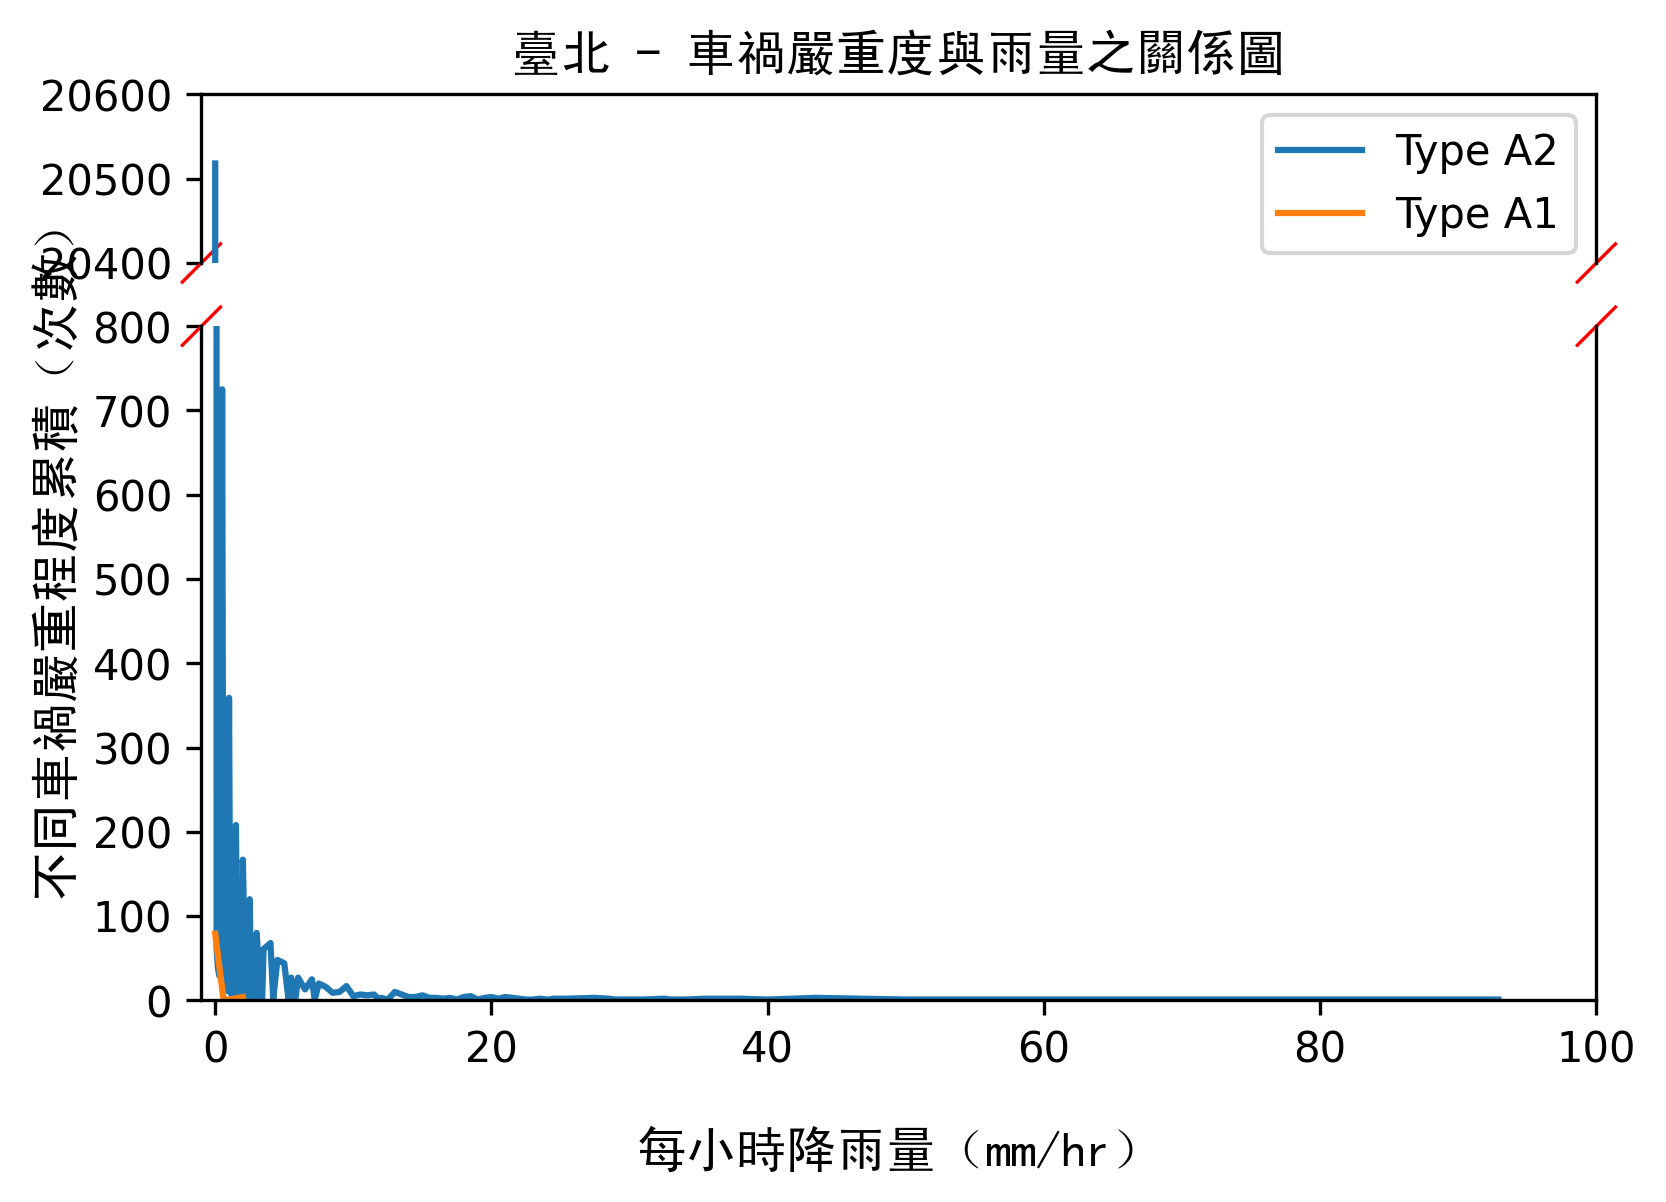

[0.0, 0.1, 0.4, 0.5, 0.6, 0.7, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.1, 2.2, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.5, 4.1, 4.4, 4.6, 4.7, 4.8, 5.1]
[5, 4, 2, 2, 4, 3, 1, 4, 4, 3, 3, 3, 1, 2, 2, 6, 3, 2, 2, 2, 3, 1, 1, 4, 3, 2, 1, 1, 2, 3, 1, 1, 1, 2, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.3, 7.5, 7.6, 7.8, 7.9, 8.0, 8.4, 8.6, 8.7, 9.3, 10.5]
[1454, 386, 423, 505, 427, 516, 533, 513, 533, 584, 564, 610, 550, 561, 631, 561, 611, 566, 672, 634, 644, 581, 608, 607, 541, 631, 561, 584, 493, 503, 449, 363, 371, 353, 356, 346, 277, 277, 233, 222, 209, 223, 191, 194, 125, 152, 127, 105, 107, 72, 56, 84, 69, 61, 42, 37, 34, 30, 20, 18, 32, 19, 16

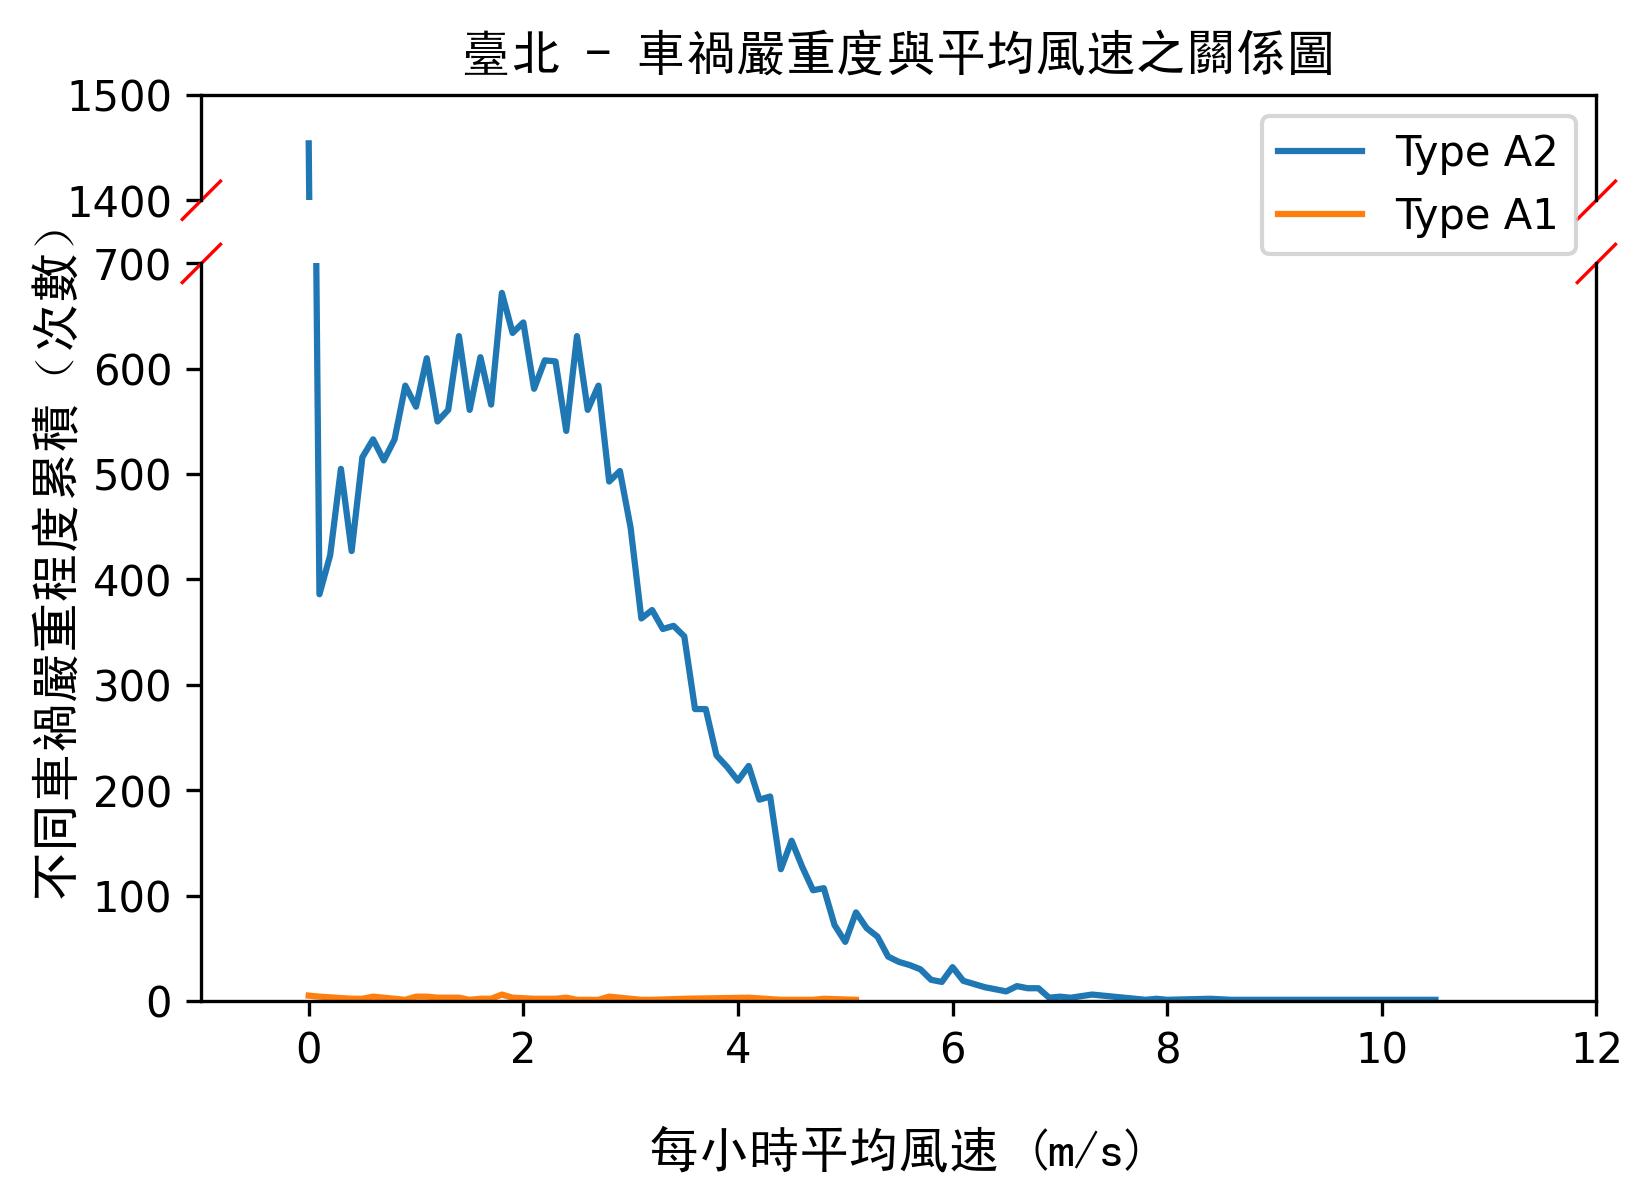

[0.0, 2.5, 2.6, 2.8, 3.4, 3.7, 4.1, 4.7, 5.6, 5.8, 6.7, 7.9, 8.7, 9.9, 12.2]
[68, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2]
[0.0, 1.0, 1.5, 1.6, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 5.0, 5.1, 5.2, 5.3, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.2, 10.3, 10.4, 10.5, 10.7, 10.8, 10.9, 11.2, 11.3, 11.4, 11.5, 11.6, 11.8, 12.1, 13.1, 13.4, 13.7, 14.6, 14.9, 15.3, 18.9, 21.2, 21.4]
[57, 1, 2, 3, 6, 1, 11, 8, 5, 5, 8, 4, 21, 1, 2, 1, 9, 1, 16, 1, 17, 18, 35, 2, 22, 1, 1, 5, 20, 25, 16, 12, 39, 1, 37, 27, 28, 41, 19, 14, 46, 34, 2, 12, 19, 4, 26, 14, 29, 17, 13, 21, 12, 4, 22, 19, 13, 19, 16, 2, 17, 24, 31, 12, 5, 28, 40, 9, 3, 21, 35, 42, 6, 6, 18, 13, 3, 29, 41, 7, 1, 9, 25, 5, 47, 8, 6, 17, 5, 46

/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


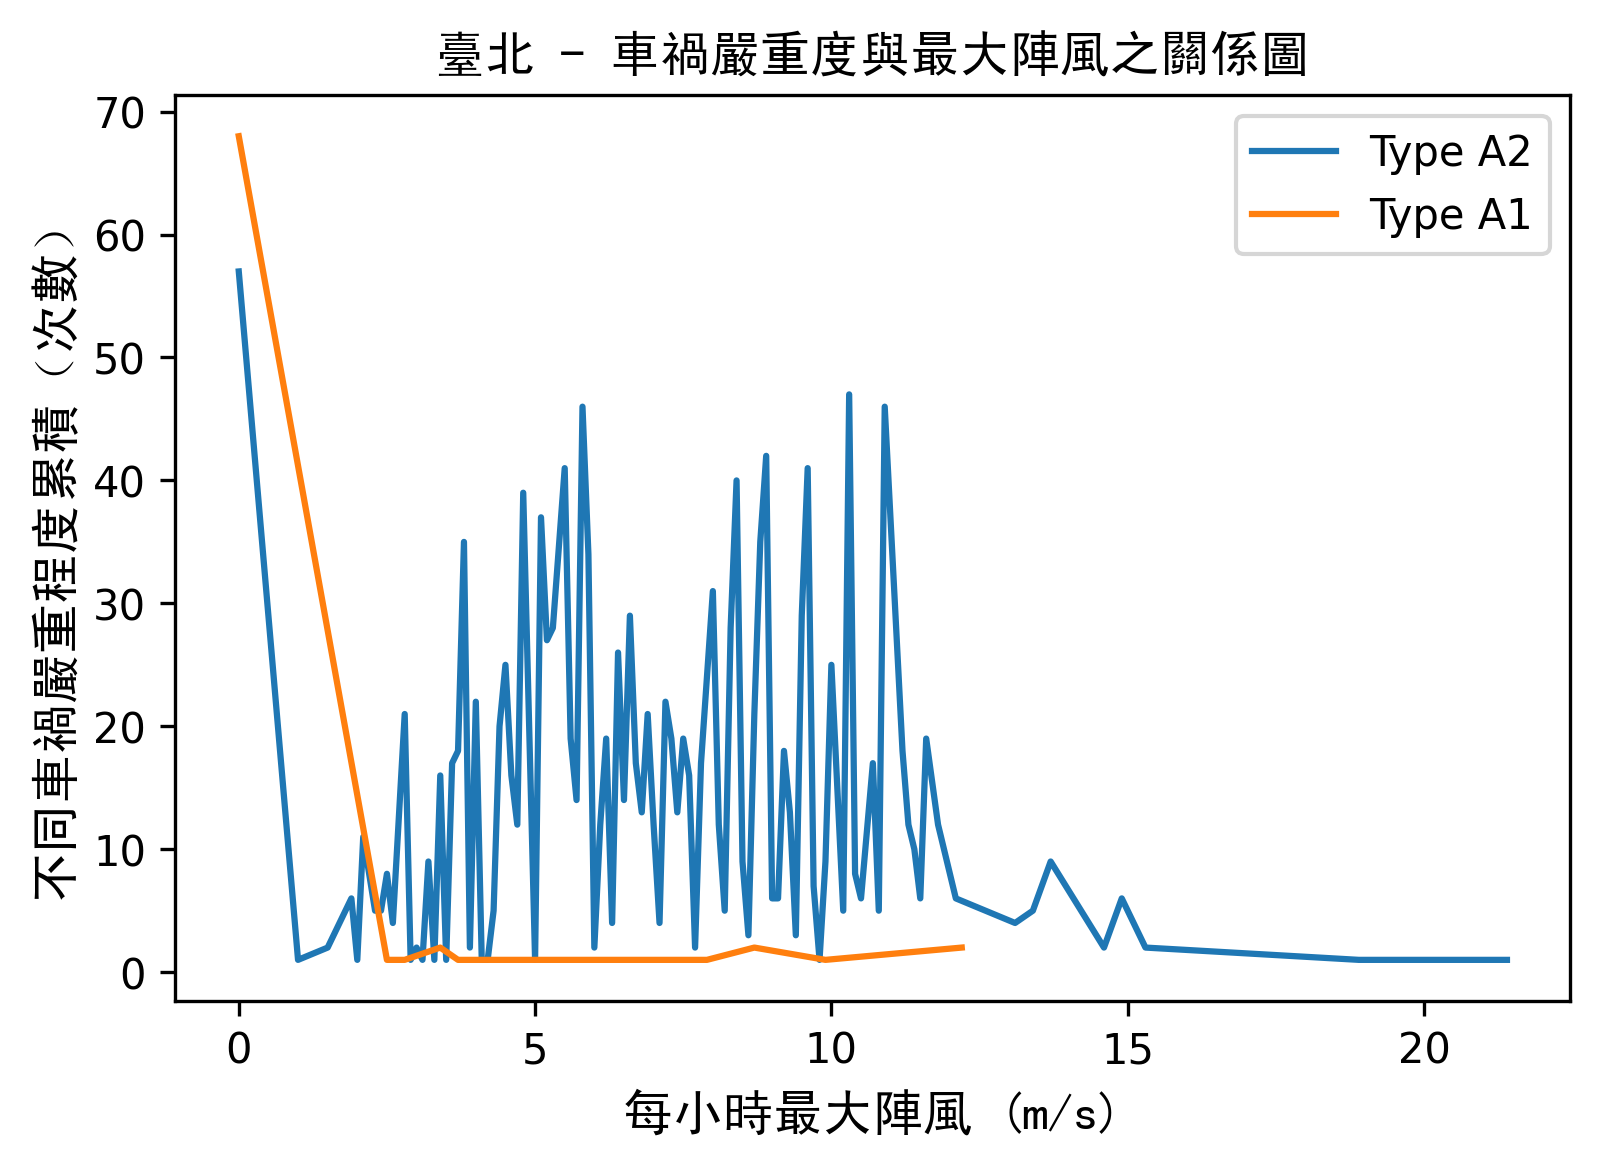

In [40]:
new_draw(A1_rain, A2_rain,A3_rain,100,0,800,20400,20600,"每小時降雨量（mm/hr）","不同車禍嚴重程度累積（次數）","臺北 - 車禍嚴重度與雨量之關係圖",True)
new_draw(A1_WS, A2_WS, A3_WS,12,0,700,1400,1500,"每小時平均風速 (m/s)","不同車禍嚴重程度累積（次數）","臺北 - 車禍嚴重度與平均風速之關係圖",True),
new_draw(A1_WSGust, A2_WSGust, A3_WSGust,100,0,100,1500,1600,"每小時最大陣風 (m/s)","不同車禍嚴重程度累積（次數）","臺北 - 車禍嚴重度與最大陣風之關係圖")

### 新北

In [9]:
A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust = get_weather_data(New_Taipei)

34926
1856


[0.0, 0.5, 4.0, 4.5, 6.0, 10.0, 13.0]
[154, 4, 1, 2, 1, 1, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.2, 1.3, 1.5, 1.6, 1.7, 2.0, 2.3, 2.5, 2.9, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.2, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.5, 26.0, 27.0, 27.5, 28.0, 28.5, 30.0, 31.0, 31.5, 33.0, 34.0, 34.5, 35.0, 35.5, 36.5, 38.0, 39.0, 40.5, 41.0, 41.5, 42.0, 43.0, 44.5, 49.0, 56.0, 57.5, 62.5, 66.0, 88.0]
[33002, 20, 32, 16, 9, 1149, 4, 1, 8, 2, 602, 1, 3, 367, 1, 1, 259, 1, 195, 1, 129, 95, 96, 84, 61, 52, 28, 25, 30, 1, 23, 15, 18, 24, 16, 19, 18, 9, 2, 5, 2, 16, 9, 7, 8, 5, 2, 4, 10, 7, 5, 3, 8, 3, 2, 1, 3, 3, 2, 3, 2, 2, 1, 6, 1, 1, 6, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 3, 2, 2, 2, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


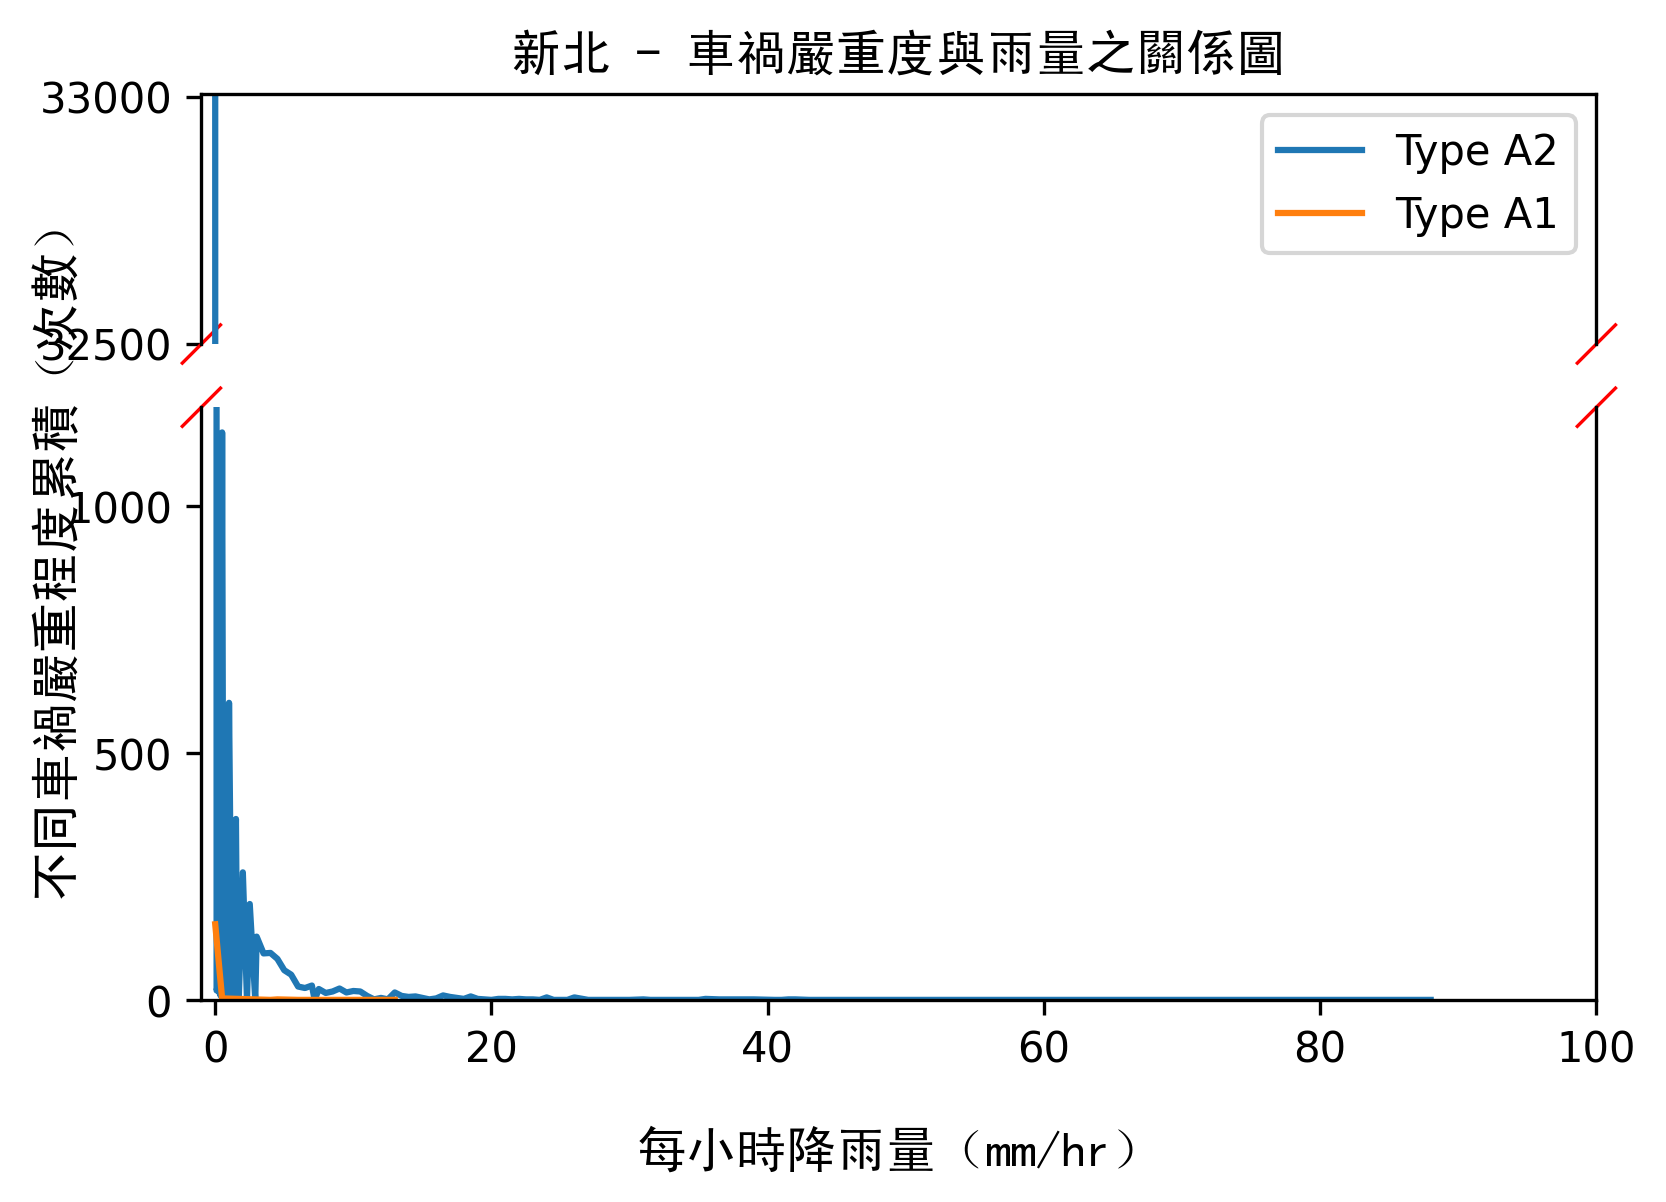

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.4, 3.5, 3.7, 3.8, 4.0, 4.2, 4.3, 4.5, 4.6, 4.7, 4.9, 5.0, 5.1, 5.2, 5.7, 6.8]
[15, 3, 8, 5, 2, 3, 9, 4, 4, 4, 3, 9, 3, 3, 7, 4, 4, 5, 3, 5, 6, 3, 6, 2, 2, 3, 5, 2, 2, 1, 1, 2, 3, 1, 4, 2, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.6, 8.7, 8.9, 9.0, 9.2, 9.5, 9.6, 9.9, 10.1, 11.2]
[1735, 635, 670, 711, 684, 817, 834, 892, 870, 1001, 947, 976, 958, 1092, 959, 1027, 1071, 946, 1047, 1029, 1016, 915, 937, 904

/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


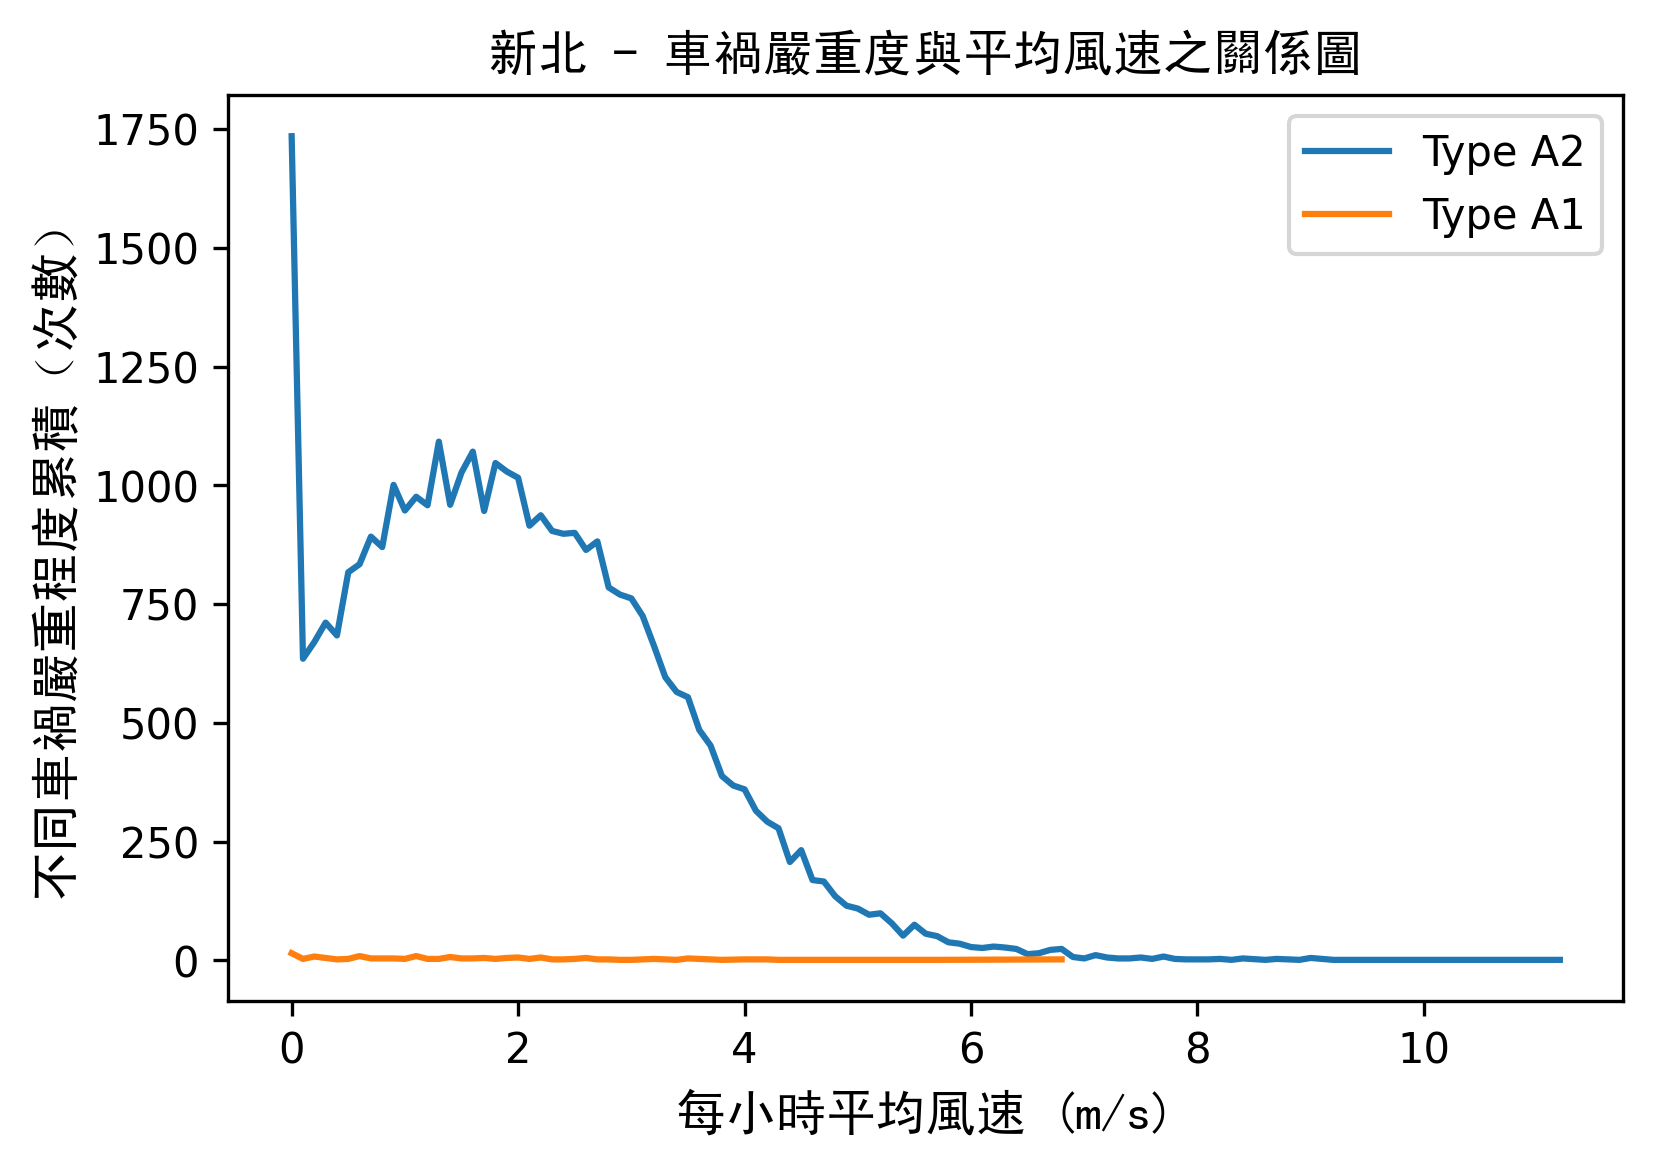

[0.0, 1.1, 1.8, 1.9, 2.6, 2.9, 3.1, 3.5, 3.7, 4.2, 4.6, 4.9, 5.0, 5.1, 5.3, 5.5, 6.3, 7.5, 7.6, 8.6, 9.0, 11.7, 12.6]
[137, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 3, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2]
[0.0, 1.2, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.8, 9.9, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.5, 11.6, 11.7, 12.0, 12.1, 12.2, 14.6, 14.7, 14.9, 15.3]
[50, 2, 12, 5, 17, 13, 25, 7, 1, 57, 22, 10, 12, 1, 13, 35, 17, 51, 9, 4, 18, 9, 28, 11, 24, 27, 73, 1, 25, 21, 9, 18, 25, 15, 73, 6, 1, 35, 18, 40, 46, 8, 41, 15, 49, 5, 28, 42, 2, 21, 8, 30, 43, 38, 20, 26, 2, 8, 10, 7, 22, 40, 16, 21

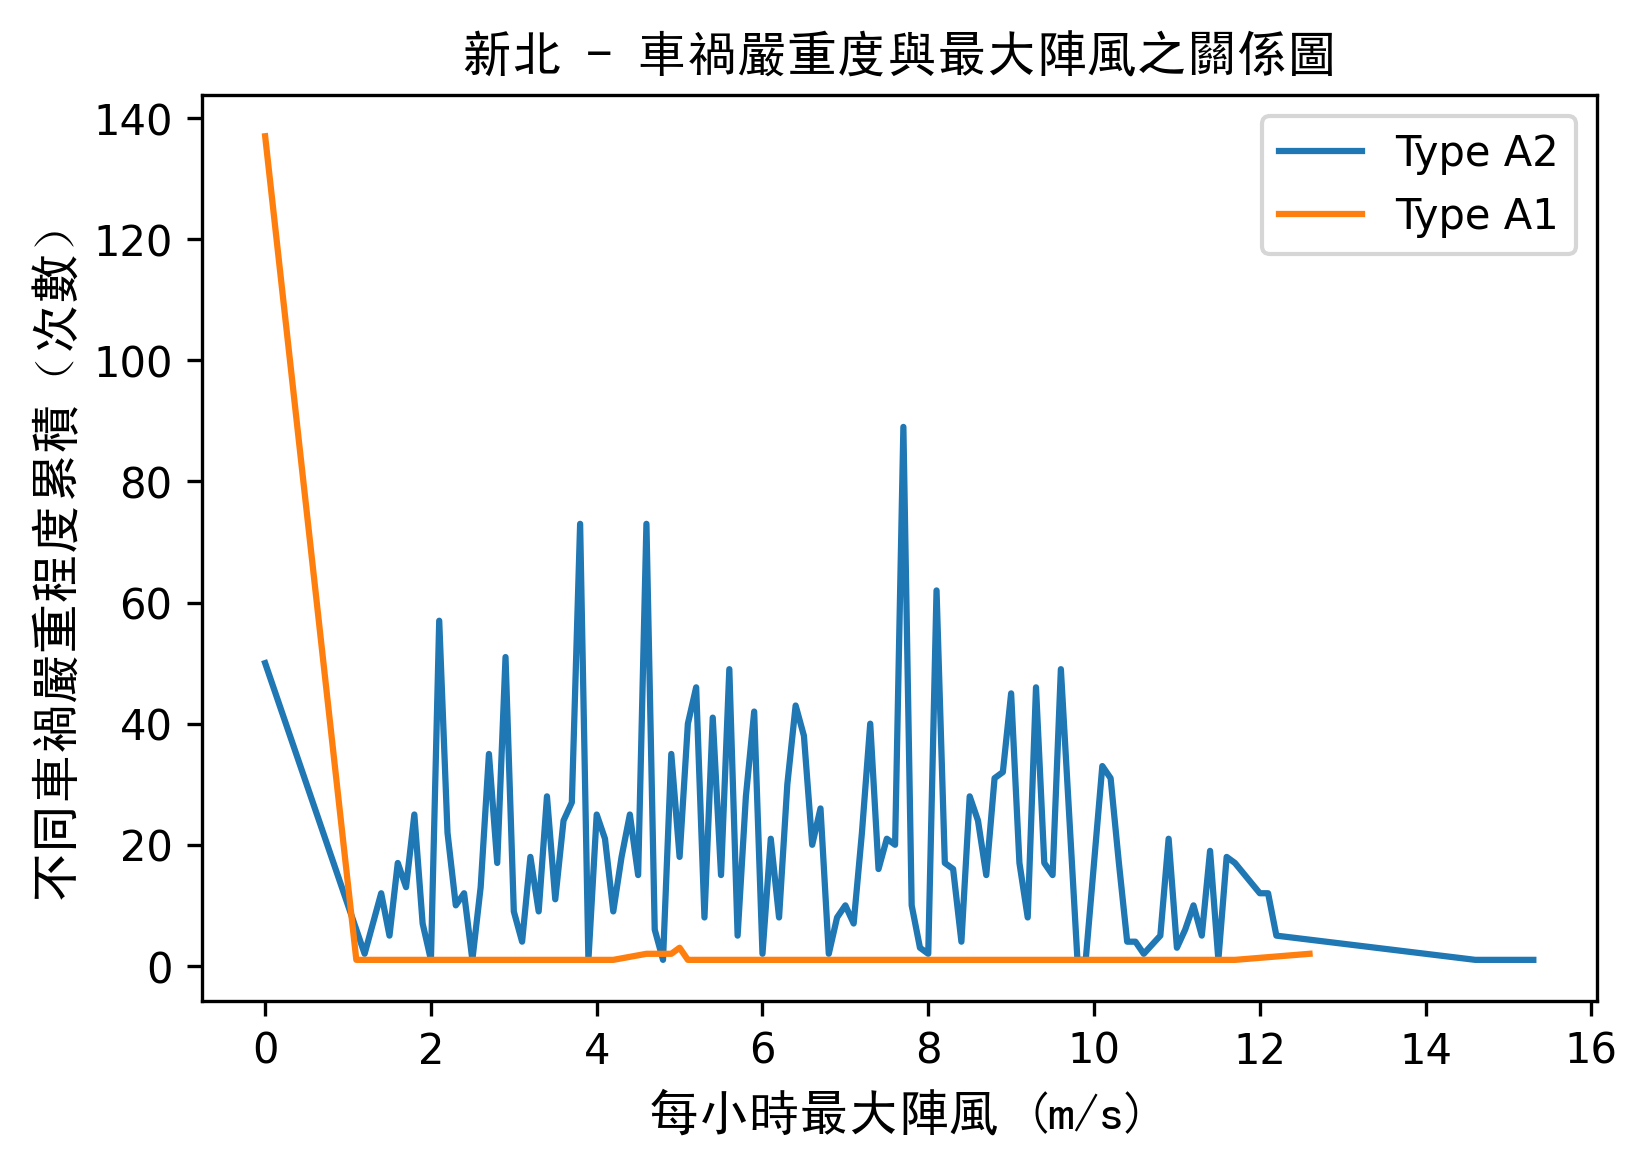

In [16]:
new_draw(A1_rain, A2_rain,A3_rain,100,0,1200,32500,33005,"每小時降雨量（mm/hr）","不同車禍嚴重程度累積（次數）","新北 - 車禍嚴重度與雨量之關係圖",True)
new_draw(A1_WS, A2_WS, A3_WS,90,0,700,1400,1500,"每小時平均風速 (m/s)","不同車禍嚴重程度累積（次數）","新北 - 車禍嚴重度與平均風速之關係圖"),
new_draw(A1_WSGust, A2_WSGust, A3_WSGust,100,0,100,1500,1600,"每小時最大陣風 (m/s)","不同車禍嚴重程度累積（次數）","新北 - 車禍嚴重度與最大陣風之關係圖")

### 桃園

In [17]:
A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust = get_weather_data(Taoyuan)

42577
517


[0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.5, 4.5]
[141, 7, 2, 1, 3, 1, 1, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.7, 2.0, 2.5, 2.7, 3.0, 3.4, 3.5, 4.0, 4.5, 5.0, 5.1, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 9.6, 10.0, 10.5, 11.0, 11.2, 11.4, 11.5, 12.0, 12.5, 12.8, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.0, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 29.5, 30.0, 30.5, 31.0, 31.5, 32.0, 32.5, 34.0, 34.5, 35.0, 35.5, 36.0, 36.5, 37.0, 39.0, 41.0, 43.5, 44.0, 48.7, 49.5, 50.0, 125.0]
[38970, 3, 4, 3, 3, 1381, 1, 2, 3, 1, 583, 1, 2, 1, 1, 363, 2, 310, 198, 1, 136, 1, 119, 122, 105, 56, 1, 54, 37, 25, 31, 32, 24, 11, 20, 24, 2, 18, 1, 16, 1, 1, 8, 10, 4, 1, 5, 8, 2, 14, 1, 3, 5, 1, 6, 6, 4, 6, 3, 6, 2, 3, 3, 6, 3, 3, 2, 7, 3, 3, 2, 9, 3, 4, 2, 3, 4, 1, 9, 4, 1, 2, 2, 1, 2, 2, 1, 2, 3, 5, 1, 1, 1, 1, 1, 2, 1, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


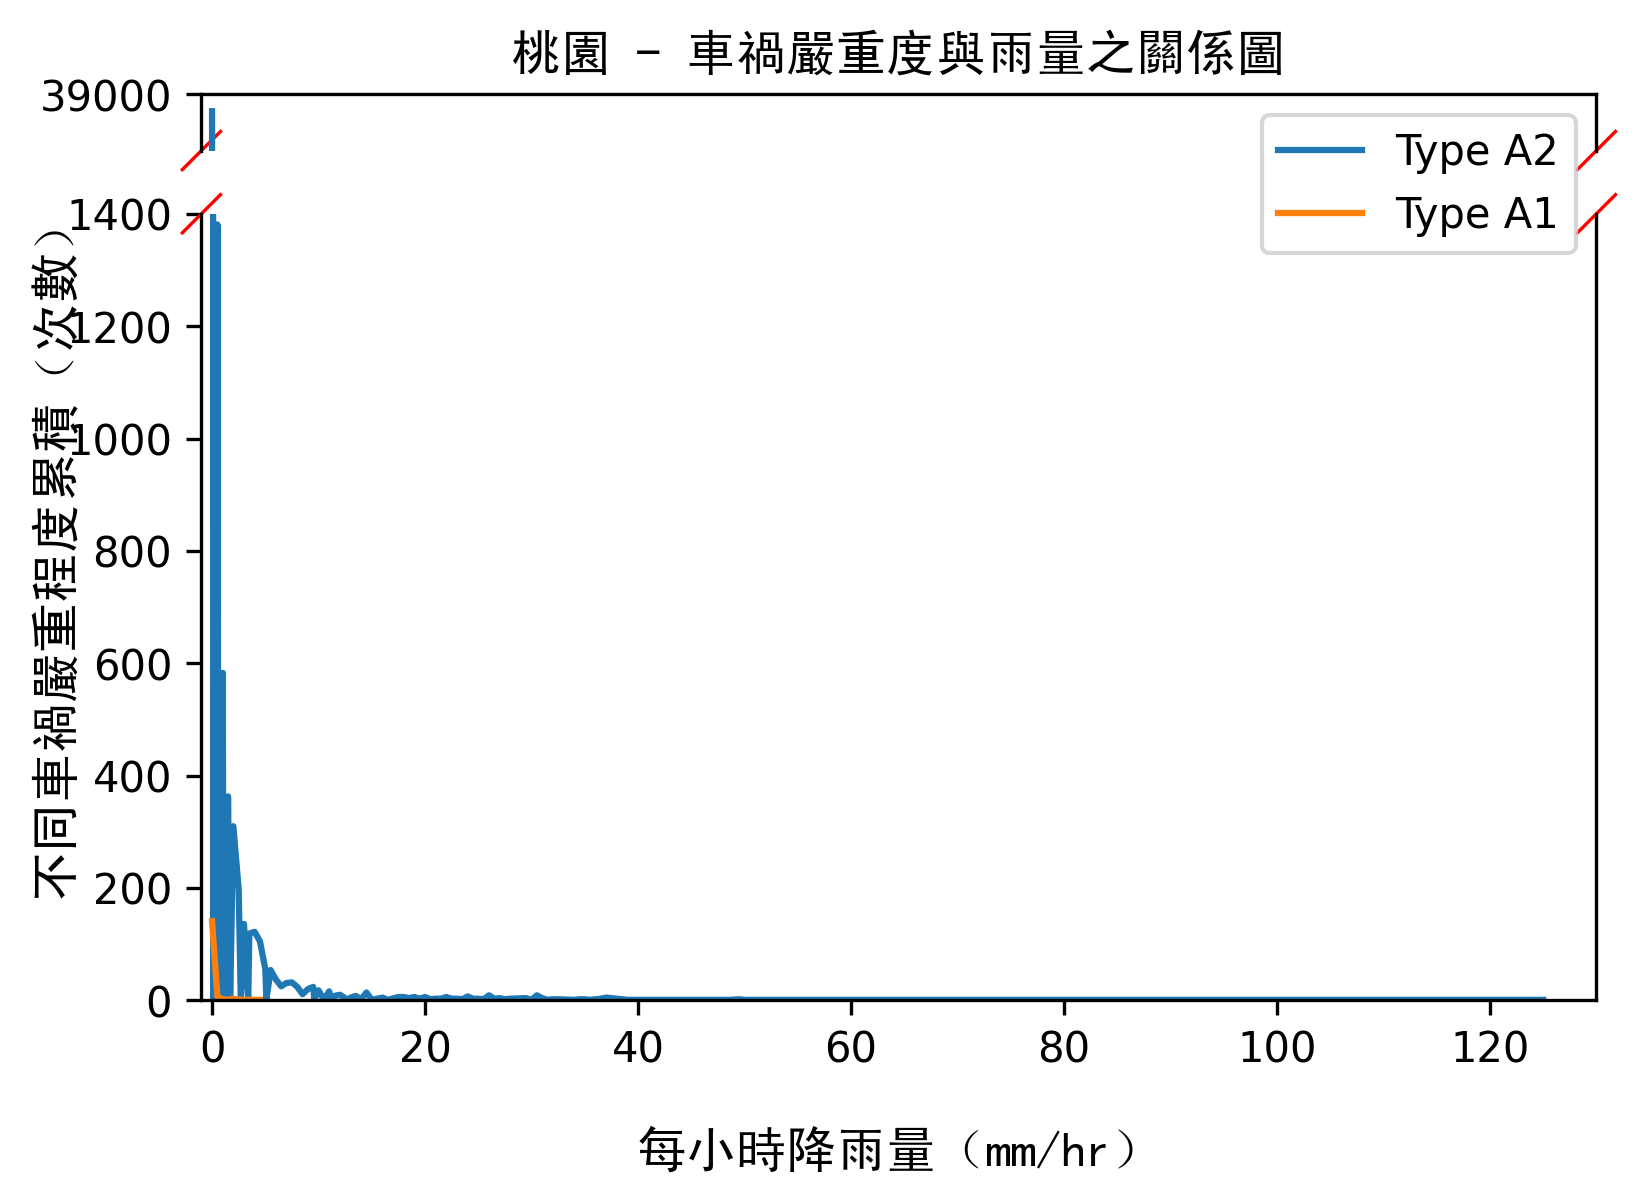

[0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.1, 4.2, 4.3, 4.4, 4.5, 4.7, 5.0, 5.1, 5.4, 5.6, 5.8, 6.6, 8.0, 8.7]
[17, 2, 5, 5, 2, 6, 3, 4, 3, 3, 6, 4, 4, 3, 4, 6, 5, 3, 5, 3, 5, 3, 3, 2, 3, 1, 3, 2, 2, 1, 1, 2, 2, 1, 4, 1, 5, 2, 2, 1, 2, 1, 2, 1, 3, 2, 2, 1, 1, 1, 1, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.1, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.1, 11.4, 11.5, 11.6, 11.8, 12

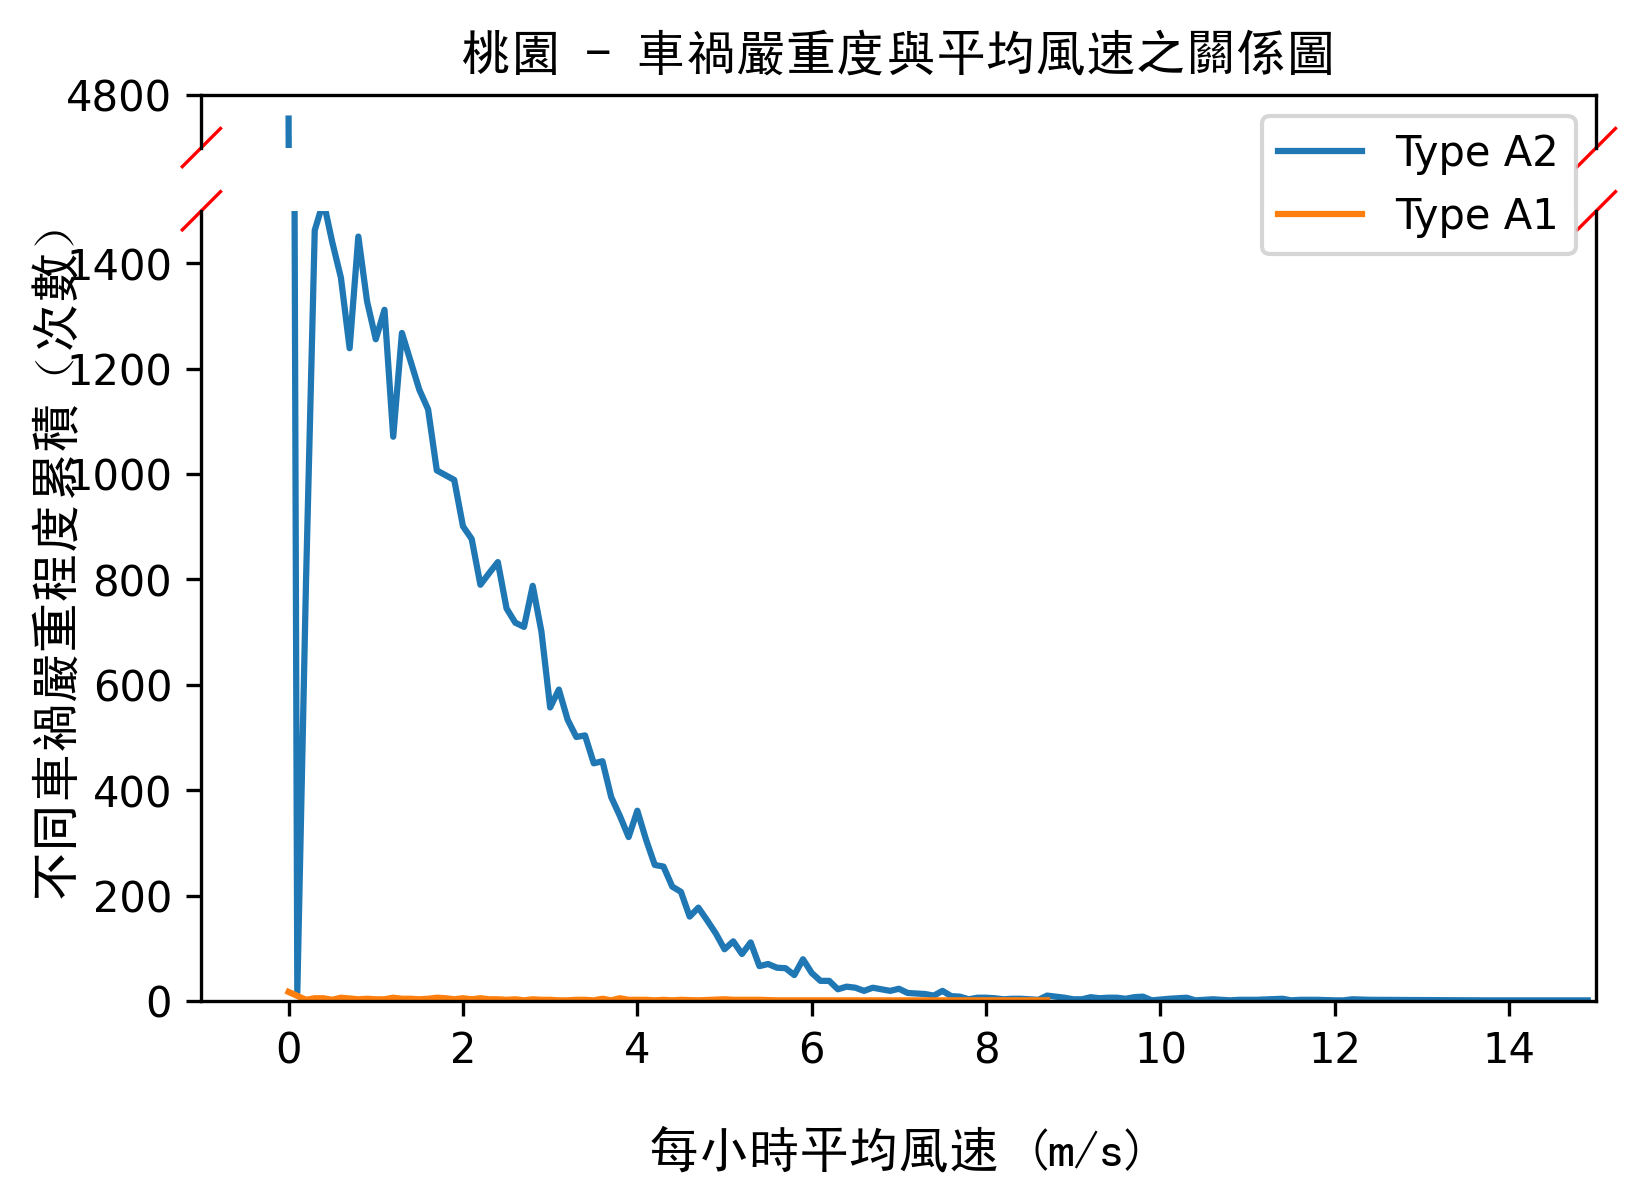

[0.0, 4.8, 6.5, 7.5, 7.9, 8.3, 9.9, 14.2, 14.9]
[149, 1, 1, 1, 1, 1, 1, 1, 1]
[0.0, 2.0, 2.5, 2.9, 3.0, 3.1, 3.8, 4.8, 5.0, 5.1, 5.8, 6.7, 7.7, 7.8, 8.0, 8.3, 8.4, 8.7, 9.4, 9.7, 9.9, 10.1, 10.2, 10.7, 10.8, 11.2, 12.1, 12.2, 12.9, 14.0, 14.5, 16.9, 17.0, 17.6, 18.1, 18.9, 19.0, 19.5, 21.3]
[60, 4, 4, 1, 1, 1, 3, 5, 2, 1, 3, 3, 3, 5, 2, 1, 3, 2, 2, 5, 3, 3, 1, 1, 2, 2, 2, 4, 8, 1, 1, 2, 1, 1, 2, 3, 1, 1, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


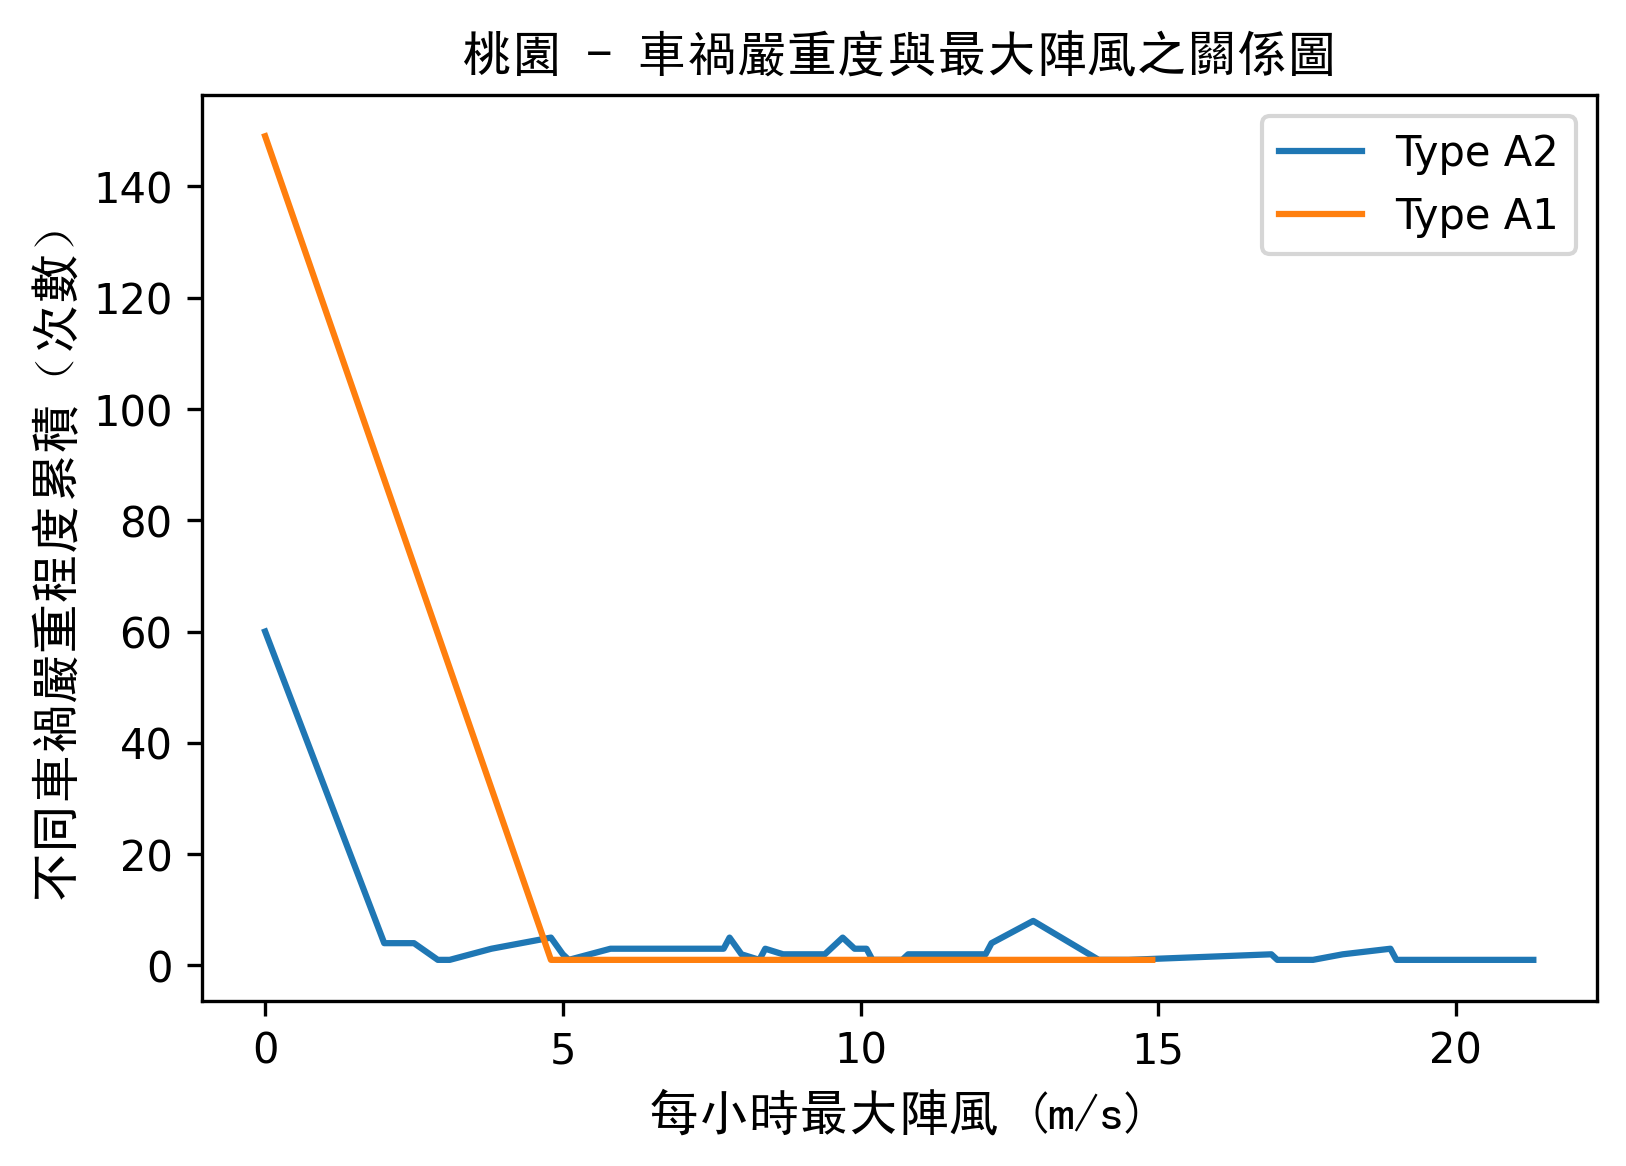

In [27]:
new_draw(A1_rain, A2_rain,A3_rain,130,0,1400,38900,39000,"每小時降雨量（mm/hr）","不同車禍嚴重程度累積（次數）","桃園 - 車禍嚴重度與雨量之關係圖",True)
new_draw(A1_WS, A2_WS, A3_WS,15,0,1500,4700,4800,"每小時平均風速 (m/s)","不同車禍嚴重程度累積（次數）","桃園 - 車禍嚴重度與平均風速之關係圖",True),
new_draw(A1_WSGust, A2_WSGust, A3_WSGust,100,0,100,1500,1600,"每小時最大陣風 (m/s)","不同車禍嚴重程度累積（次數）","桃園 - 車禍嚴重度與最大陣風之關係圖")

### 台南

In [28]:
A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust = get_weather_data(Tainan)

33548
5764


[0.0, 0.5, 1.0, 2.5, 4.0, 11.5]
[178, 2, 1, 1, 1, 1]
[0.0, 0.5, 0.6, 1.0, 1.4, 1.5, 1.6, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 21.5, 22.0, 22.5, 23.0, 23.5, 24.0, 24.5, 25.5, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 30.5, 31.0, 32.5, 33.5, 34.0, 35.0, 35.5, 36.0, 36.5, 37.0, 39.5, 41.0, 42.5, 44.0, 45.0, 46.0, 48.0, 48.5, 50.5, 53.0, 54.0, 54.5, 56.0, 58.5, 59.5, 63.0, 80.5, 86.0]
[36680, 792, 6, 300, 4, 213, 8, 171, 127, 77, 67, 66, 62, 37, 27, 33, 45, 23, 28, 18, 16, 11, 14, 22, 12, 14, 17, 11, 11, 8, 10, 8, 7, 7, 16, 9, 5, 2, 12, 7, 9, 1, 1, 3, 7, 3, 5, 1, 4, 3, 4, 2, 6, 1, 1, 3, 2, 5, 4, 2, 2, 2, 1, 3, 1, 4, 2, 2, 1, 1, 3, 1, 1, 6, 2, 2, 2, 1, 1, 1, 2, 1, 1, 3, 6, 1, 3, 1, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


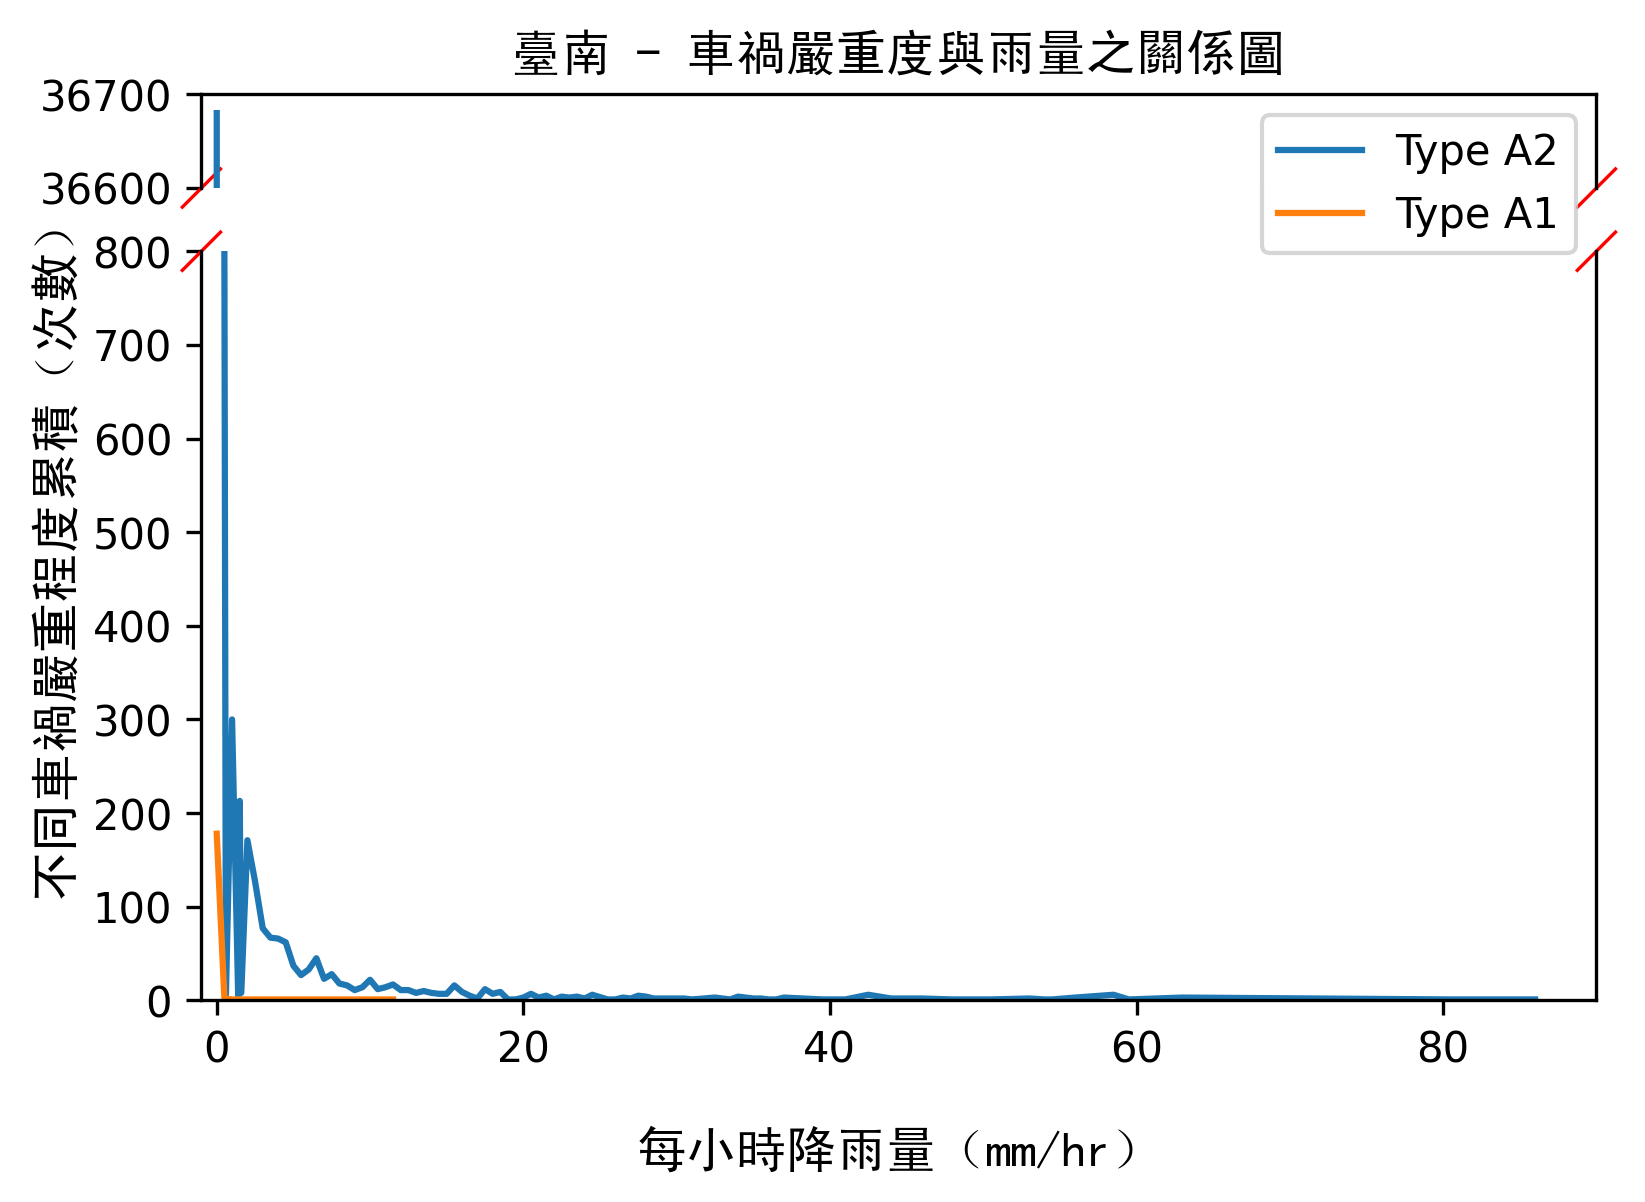

[0.0, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.2, 5.3, 6.1, 7.0]
[8, 2, 3, 4, 4, 2, 2, 1, 1, 2, 5, 9, 12, 5, 8, 10, 5, 4, 6, 5, 5, 3, 7, 4, 6, 3, 5, 2, 10, 3, 2, 4, 5, 3, 2, 3, 1, 1, 1, 1, 2, 1, 2, 1, 1, 1, 1, 2, 1, 1, 1, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.1, 9.2, 9.3, 9.4, 9.6, 9.9, 10.2, 10.5, 11.1, 12.1]
[750, 194, 218, 314, 343, 453, 495, 532, 605, 764, 807, 910, 830, 1024, 1068, 1

/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


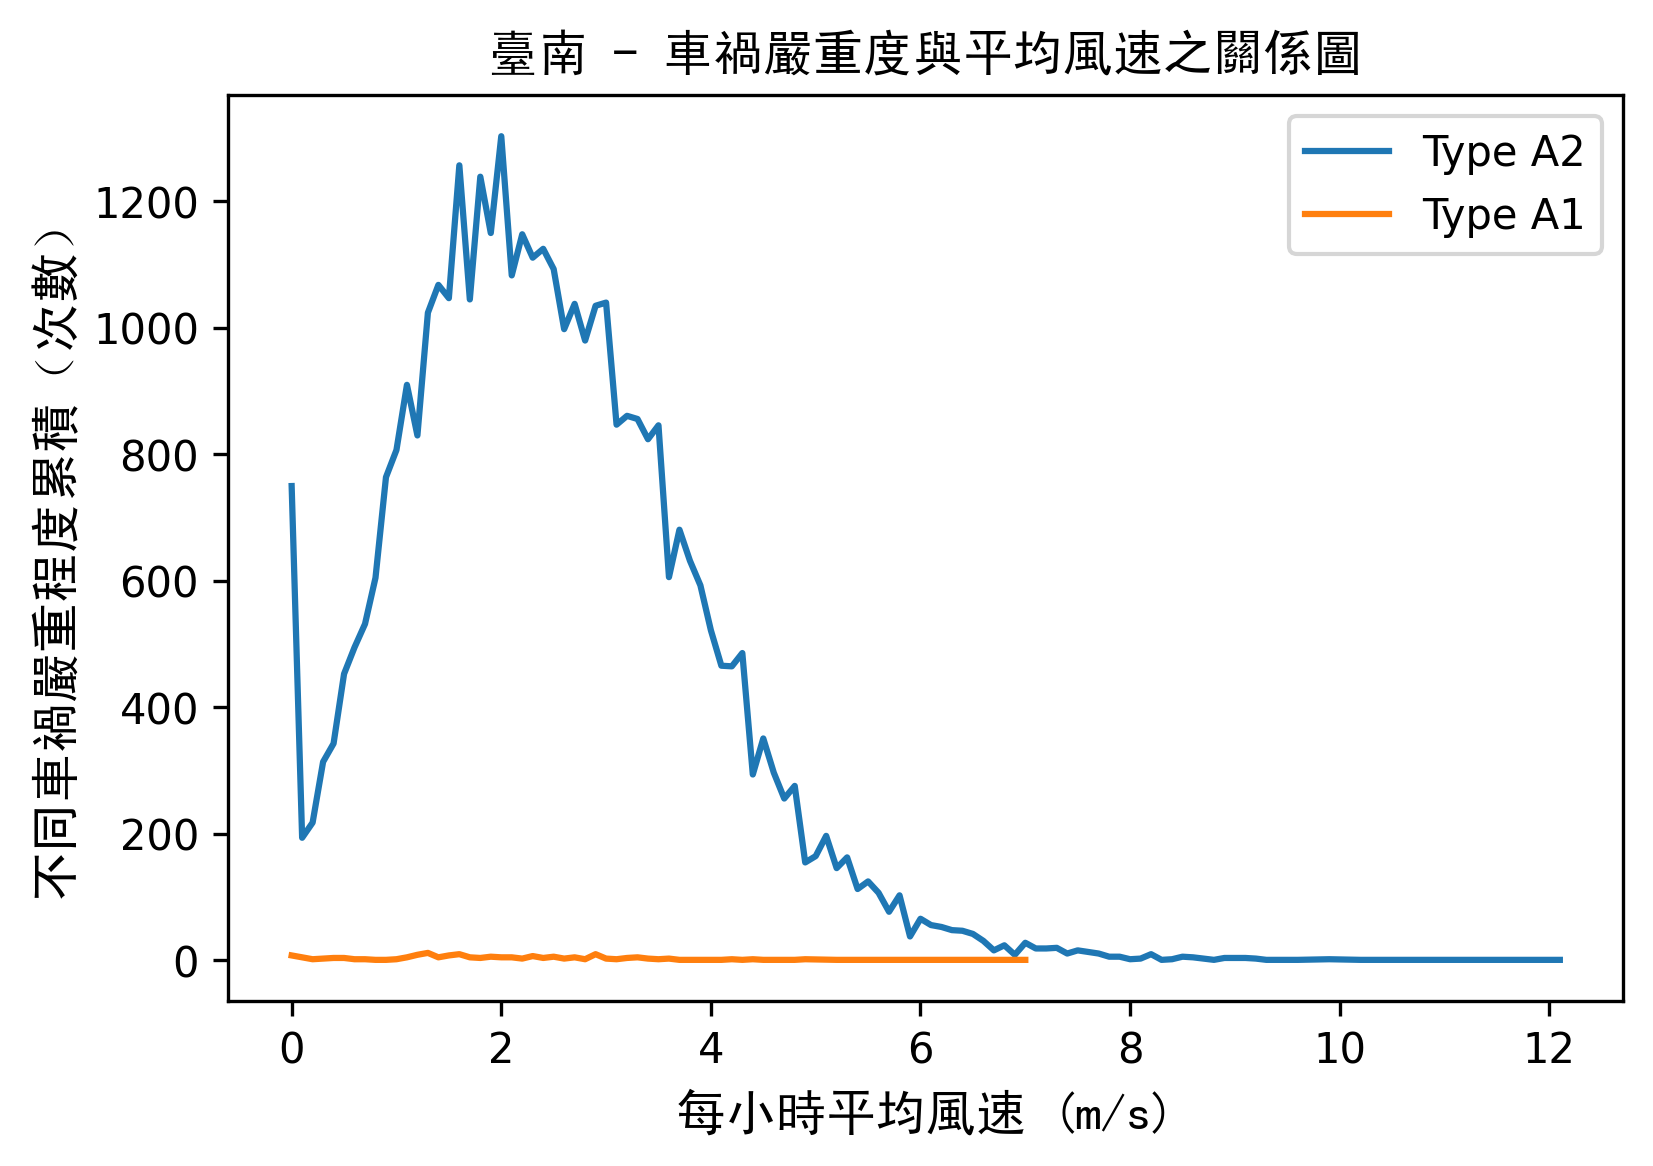

[0.0, 2.8, 3.6, 3.7, 4.2, 4.3, 4.5, 4.9, 5.2, 5.6, 6.0, 6.8, 7.0, 7.5, 7.6, 9.3, 14.9]
[164, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 2, 1, 1, 2, 1, 1]
[0.0, 1.7, 1.9, 2.1, 2.3, 2.4, 2.5, 2.7, 2.8, 2.9, 3.0, 3.1, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.7, 10.8, 10.9, 11.1, 11.3, 11.4, 11.5, 11.6, 11.7, 11.8, 11.9, 12.1, 12.2, 12.3, 12.4, 12.6, 12.7, 12.8, 12.9, 13.1, 13.3, 13.4, 13.5, 13.8, 14.2, 14.4, 14.6, 15.1, 15.6, 16.0, 17.1, 17.6, 18.3, 19.6, 21.2]
[39, 9, 13, 15, 31, 42, 72, 59, 6, 46, 1, 85, 106, 94, 15, 129, 65, 129, 1, 94, 60, 55, 79, 8, 68, 84, 83, 94, 62, 70, 47, 67, 116, 66, 102, 61, 81, 90, 66, 107, 102, 53, 95, 90, 13, 81, 62, 135, 59, 7, 77, 74, 99, 75, 92, 18, 63, 40

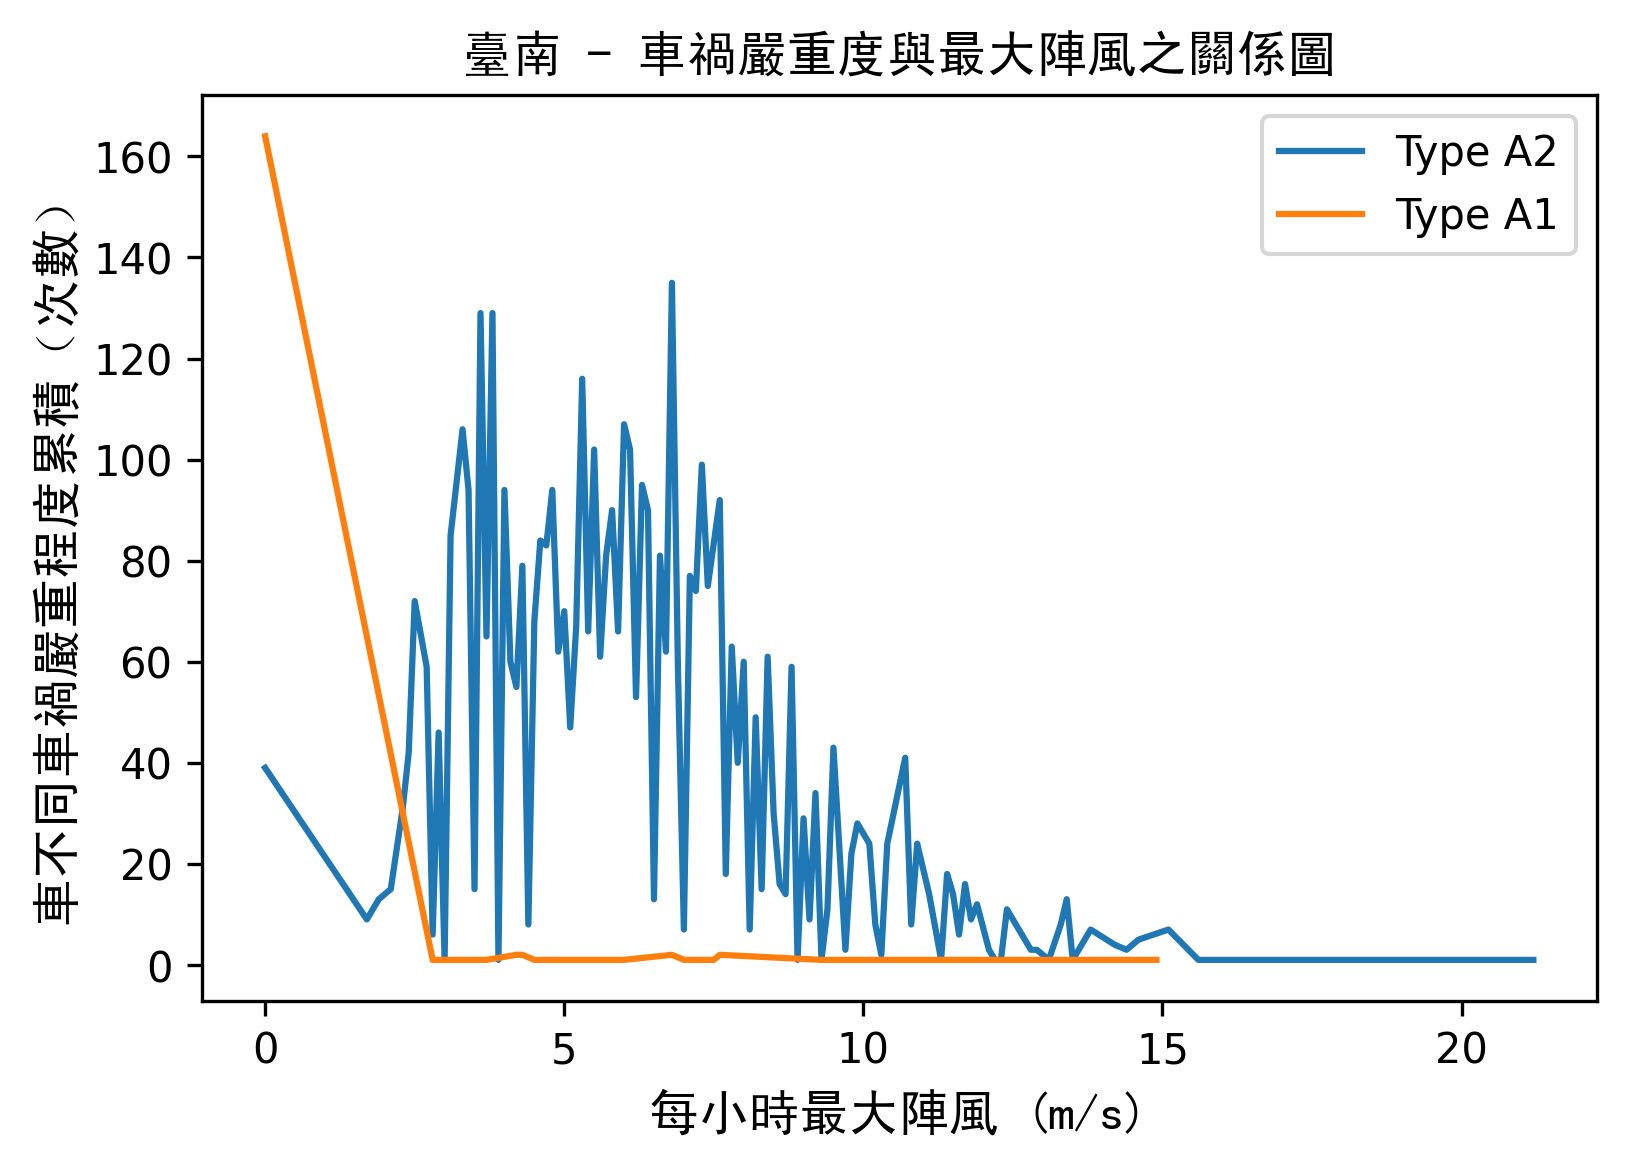

In [31]:
new_draw(A1_rain, A2_rain,A3_rain,90,0,800,36600,36700,"每小時降雨量（mm/hr）","不同車禍嚴重程度累積（次數）","臺南 - 車禍嚴重度與雨量之關係圖",True)
new_draw(A1_WS, A2_WS, A3_WS,13,0,700,1400,1500,"每小時平均風速 (m/s)","不同車禍嚴重程度累積（次數）","臺南 - 車禍嚴重度與平均風速之關係圖"),
new_draw(A1_WSGust, A2_WSGust, A3_WSGust,100,0,100,1500,1600,"每小時最大陣風 (m/s)","車不同車禍嚴重程度累積（次數）","臺南 - 車禍嚴重度與最大陣風之關係圖")

### 高雄

In [32]:
A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust = get_weather_data(Kaohsiung)

41684
1377


[0.0, 1.0, 1.5, 4.0, 6.0, 7.0]
[196, 2, 1, 2, 1, 2]
[0.0, 0.2, 0.3, 0.5, 0.6, 1.0, 1.5, 1.6, 2.0, 2.2, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 14.5, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.5, 22.0, 22.5, 23.5, 24.0, 24.5, 25.0, 26.0, 26.5, 27.0, 27.5, 28.0, 28.5, 29.0, 29.5, 30.0, 31.0, 31.5, 32.0, 33.5, 34.0, 34.5, 36.0, 37.5, 38.0, 40.0, 40.5, 41.5, 43.0, 44.5, 46.0, 66.5, 73.5, 77.0, 80.0]
[40414, 2, 5, 846, 2, 313, 197, 1, 139, 1, 107, 73, 56, 70, 46, 45, 35, 42, 36, 38, 27, 18, 30, 21, 7, 10, 21, 5, 14, 10, 9, 10, 7, 2, 6, 5, 2, 11, 6, 7, 3, 7, 1, 5, 4, 5, 8, 1, 3, 1, 9, 8, 2, 5, 2, 3, 4, 2, 6, 1, 2, 2, 5, 2, 2, 1, 1, 3, 3, 4, 1, 1, 1, 1, 6, 1, 2, 1, 1, 1, 1, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


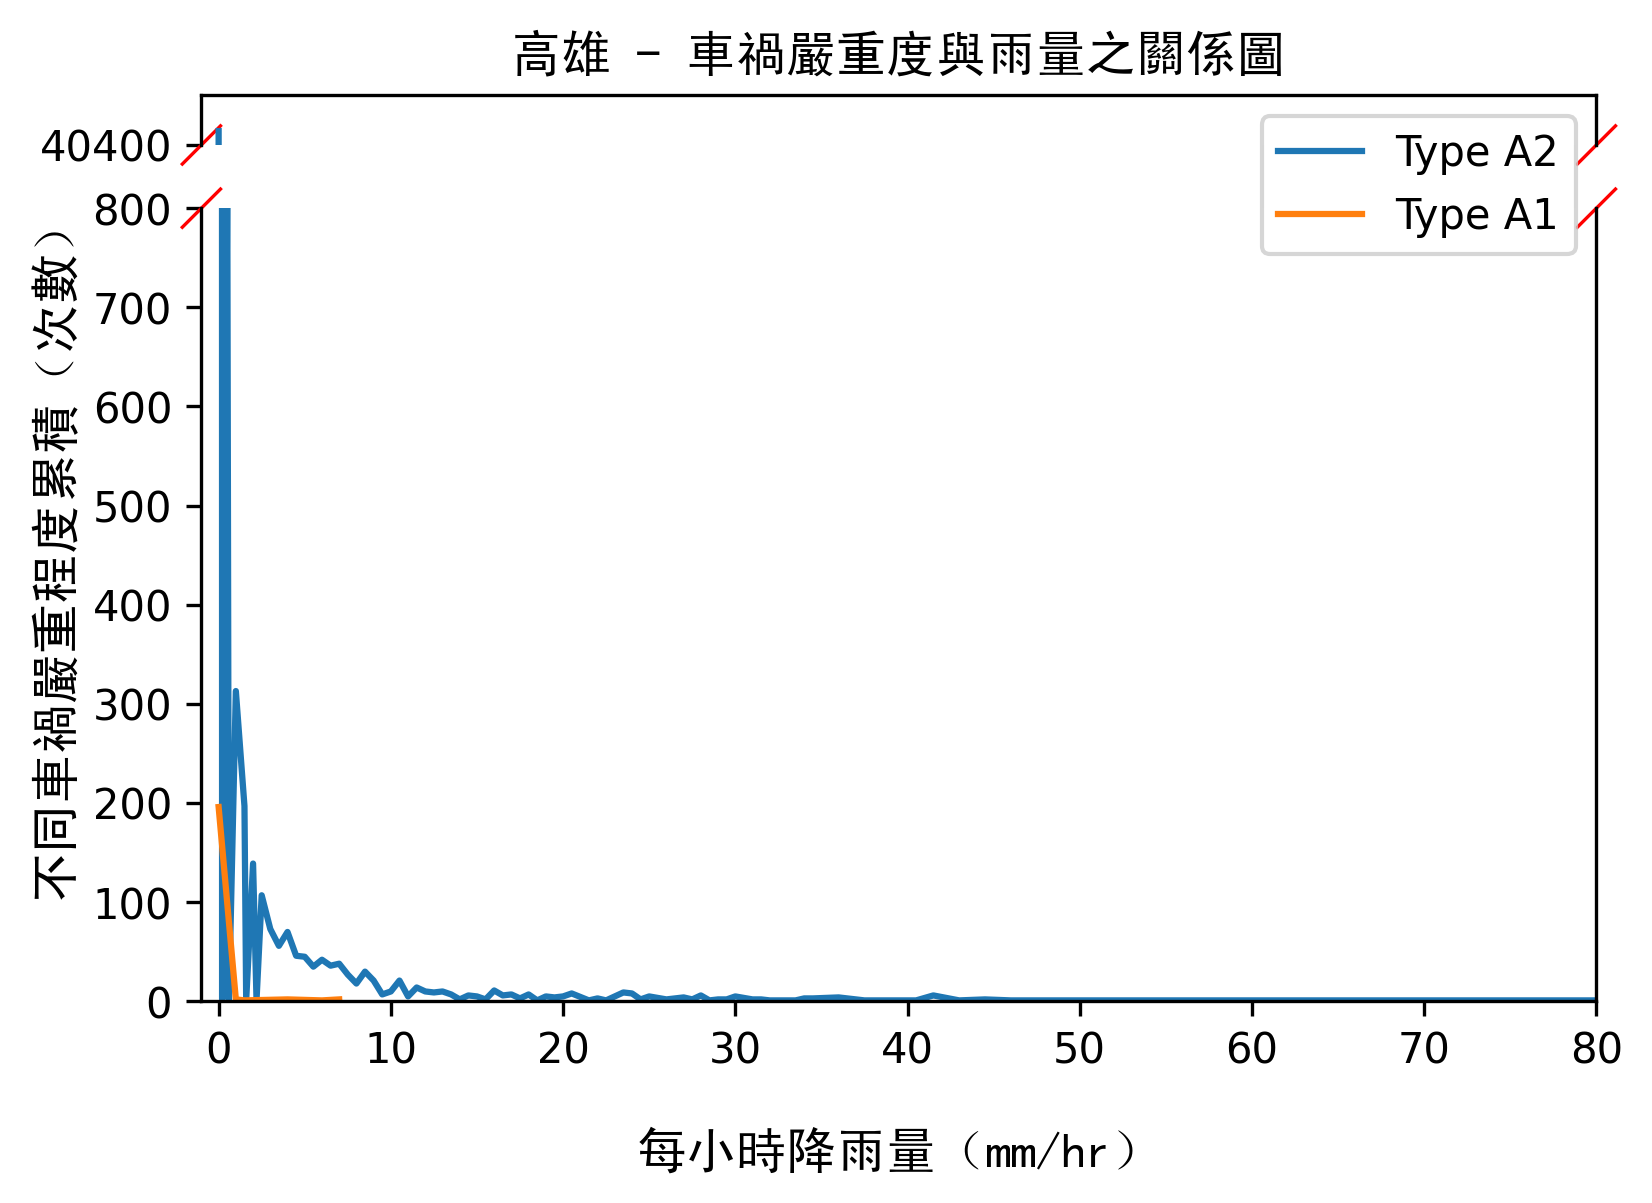

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.9, 4.5, 4.6, 5.8, 6.3]
[5, 1, 6, 3, 2, 3, 7, 8, 7, 14, 6, 8, 12, 8, 7, 6, 15, 9, 8, 8, 4, 5, 5, 2, 2, 7, 3, 2, 4, 1, 4, 6, 1, 3, 1, 4, 1, 1, 1, 1, 1, 1, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.7, 7.8, 7.9, 8.0, 8.1, 8.3, 8.7, 8.9, 9.2, 9.3, 9.7, 10.0]
[1214, 281, 394, 462, 542, 787, 933, 1075, 1280, 1460, 1582, 1702, 1849, 1853, 1804, 1849, 1812, 1748, 1702, 1650, 1478, 1282, 1401, 1184, 1207, 1088, 905, 963, 834, 687, 679, 591, 538, 467, 437, 358, 332, 336

/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


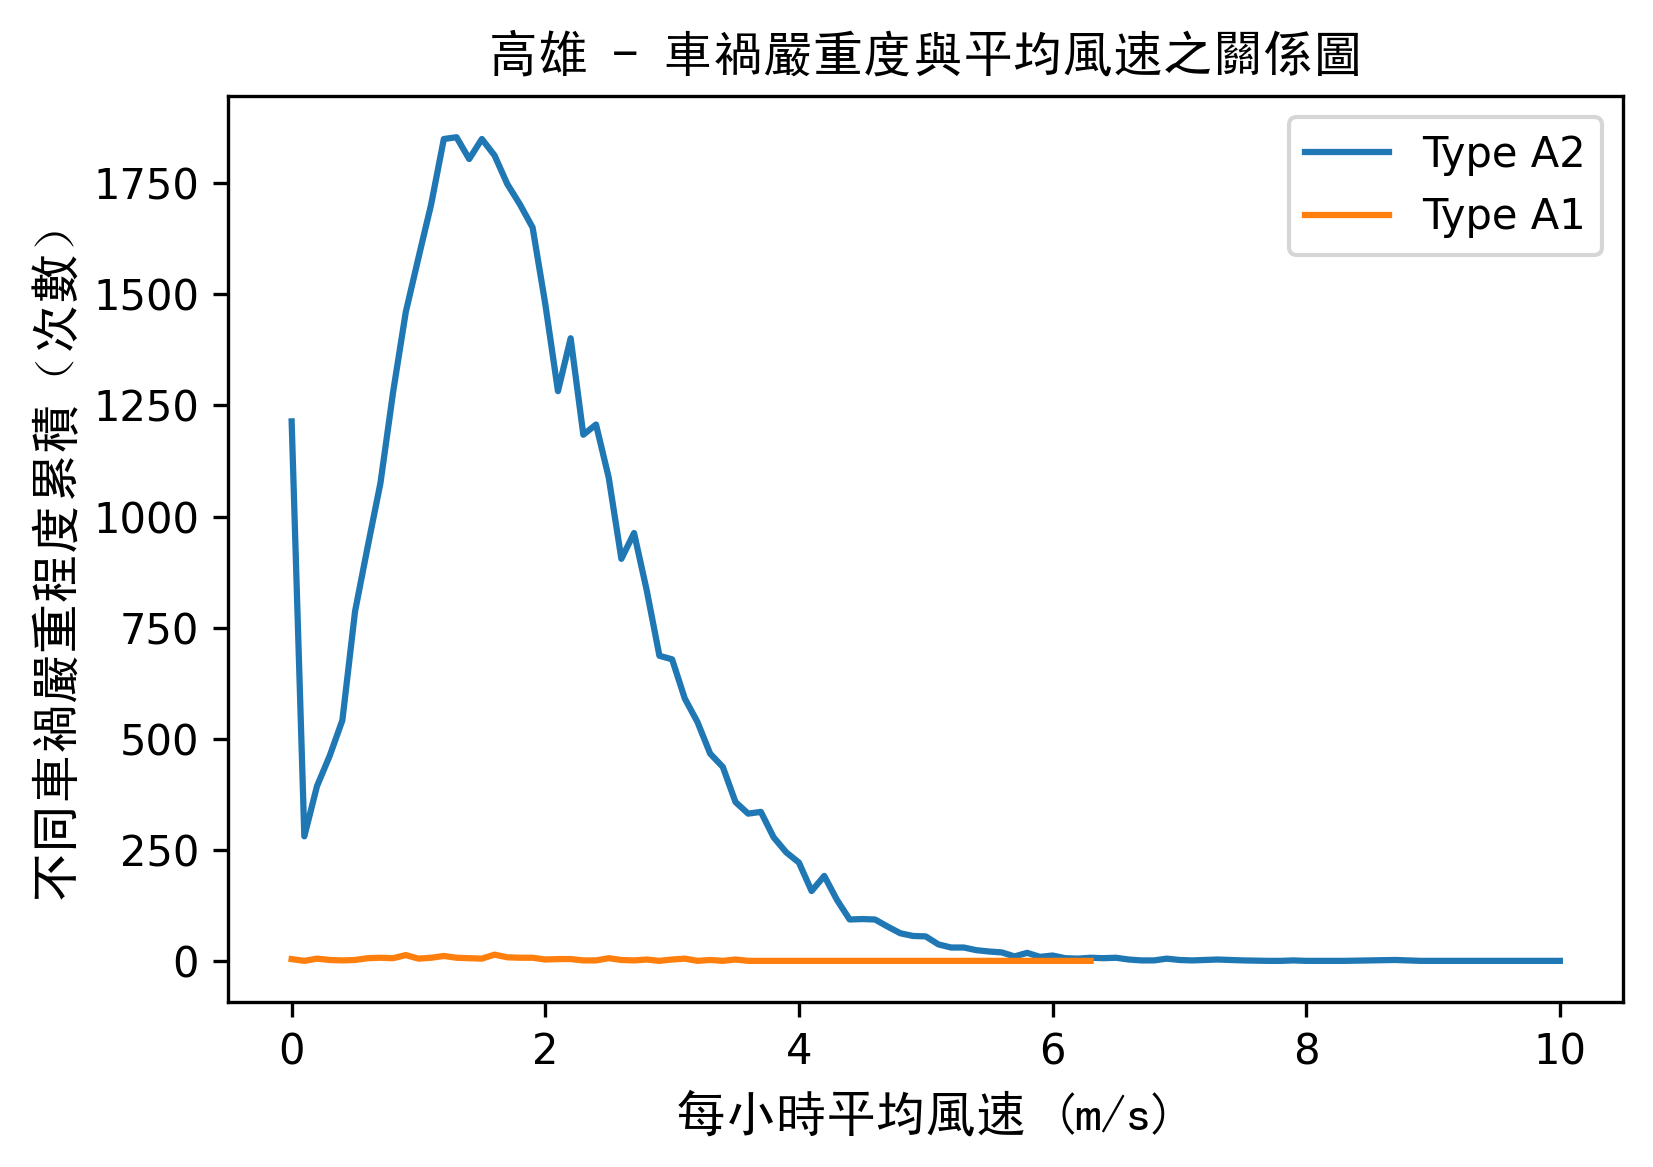

[0.0, 3.4, 3.5, 4.5, 4.7, 6.2, 6.3, 7.5]
[197, 1, 1, 1, 1, 1, 1, 1]
[0.0, 1.3, 2.0, 2.1, 2.2, 2.3, 2.5, 2.7, 3.1, 3.2, 3.3, 3.4, 3.5, 3.7, 3.9, 4.0, 4.1, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.2, 5.3, 5.5, 5.6, 5.7, 5.8, 6.1, 6.4, 6.5, 6.6, 6.7, 7.0, 7.2, 7.3, 7.5, 7.6, 7.7, 7.9, 8.1, 8.2, 8.8, 8.9, 9.1, 9.6, 10.4, 11.8, 12.2, 13.9, 14.6]
[190, 1, 9, 8, 6, 9, 14, 20, 17, 30, 15, 15, 22, 11, 18, 44, 21, 10, 14, 14, 30, 16, 17, 20, 22, 10, 10, 1, 3, 12, 10, 9, 3, 6, 9, 9, 2, 12, 4, 3, 5, 5, 6, 3, 3, 1, 1, 5, 1, 3, 1, 1]
[]
[]


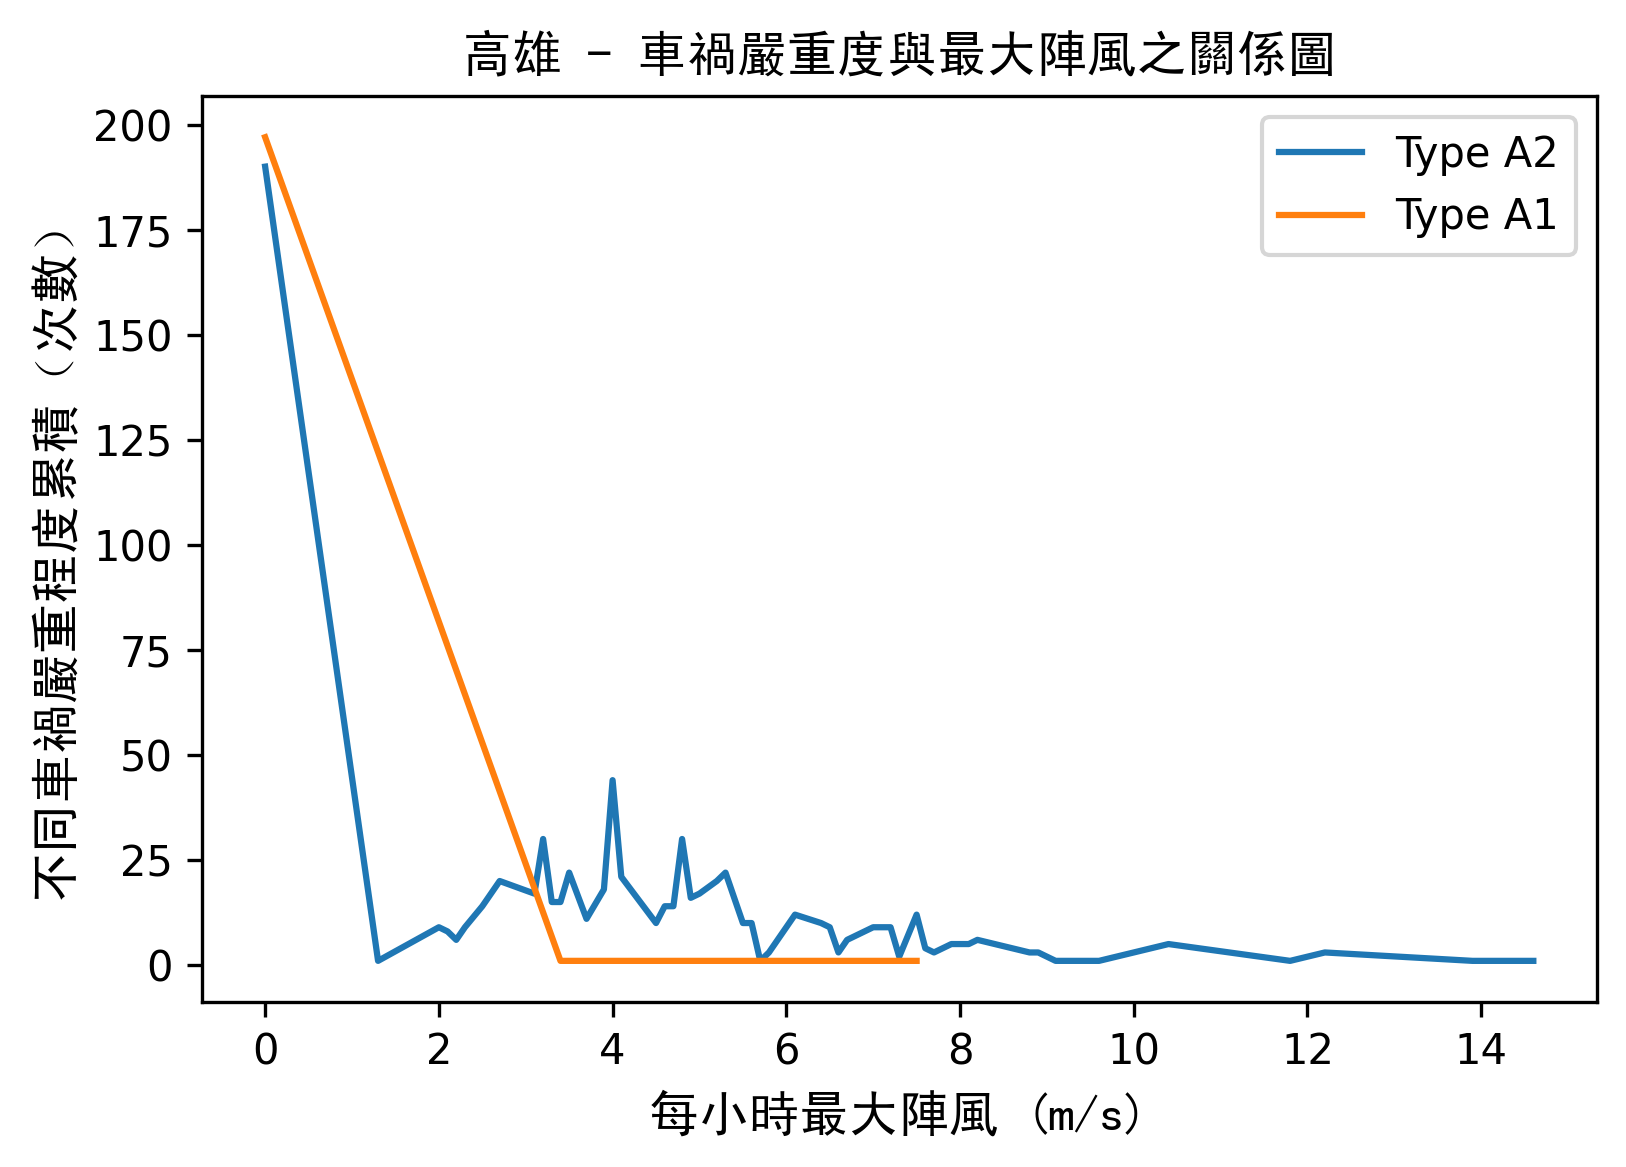

In [34]:
new_draw(A1_rain, A2_rain,A3_rain,80,0,800,40400,40450,"每小時降雨量（mm/hr）","不同車禍嚴重程度累積（次數）","高雄 - 車禍嚴重度與雨量之關係圖",True)
new_draw(A1_WS, A2_WS, A3_WS,10,0,700,1400,1500,"每小時平均風速 (m/s)","不同車禍嚴重程度累積（次數）","高雄 - 車禍嚴重度與平均風速之關係圖"),
new_draw(A1_WSGust, A2_WSGust, A3_WSGust,100,0,100,1500,1600,"每小時最大陣風 (m/s)","不同車禍嚴重程度累積（次數）","高雄 - 車禍嚴重度與最大陣風之關係圖")

### 台中

In [35]:
A1_rain, A2_rain, A3_rain, A1_WS, A2_WS, A3_WS, A1_WSGust, A2_WSGust, A3_WSGust  = get_weather_data(Taichung)

38183
4949


[0.0, 0.5, 1.0, 1.5, 2.5, 3.0, 4.5, 10.0]
[178, 8, 2, 1, 1, 1, 1, 1]
[0.0, 0.1, 0.4, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0, 10.5, 11.0, 11.5, 12.0, 12.5, 13.0, 13.5, 14.0, 15.0, 15.5, 16.0, 16.5, 17.0, 17.5, 18.0, 18.5, 19.0, 19.5, 20.0, 20.5, 21.0, 22.5, 23.0, 23.5, 24.0, 25.0, 25.5, 26.5, 28.0, 28.5, 29.0, 29.5, 30.0, 31.0, 32.0, 33.5, 34.0, 34.5, 35.0, 35.5, 36.0, 37.0, 38.5, 39.0, 41.0, 41.5, 42.0, 42.5, 43.0, 44.0, 45.5, 47.0, 52.5, 54.5, 55.5, 56.0, 58.5, 60.0, 69.0, 82.0]
[39790, 2, 1, 945, 436, 310, 217, 171, 140, 108, 71, 79, 40, 39, 39, 34, 20, 38, 19, 15, 15, 33, 13, 10, 11, 13, 10, 17, 10, 14, 9, 6, 12, 4, 5, 4, 3, 13, 8, 1, 4, 1, 1, 5, 2, 4, 2, 4, 1, 1, 1, 5, 5, 5, 1, 6, 2, 1, 2, 2, 3, 1, 1, 1, 3, 4, 2, 3, 1, 2, 1, 2, 1, 2, 2, 2, 1, 2, 1, 2, 1, 2, 1]
[]
[]


/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:45: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


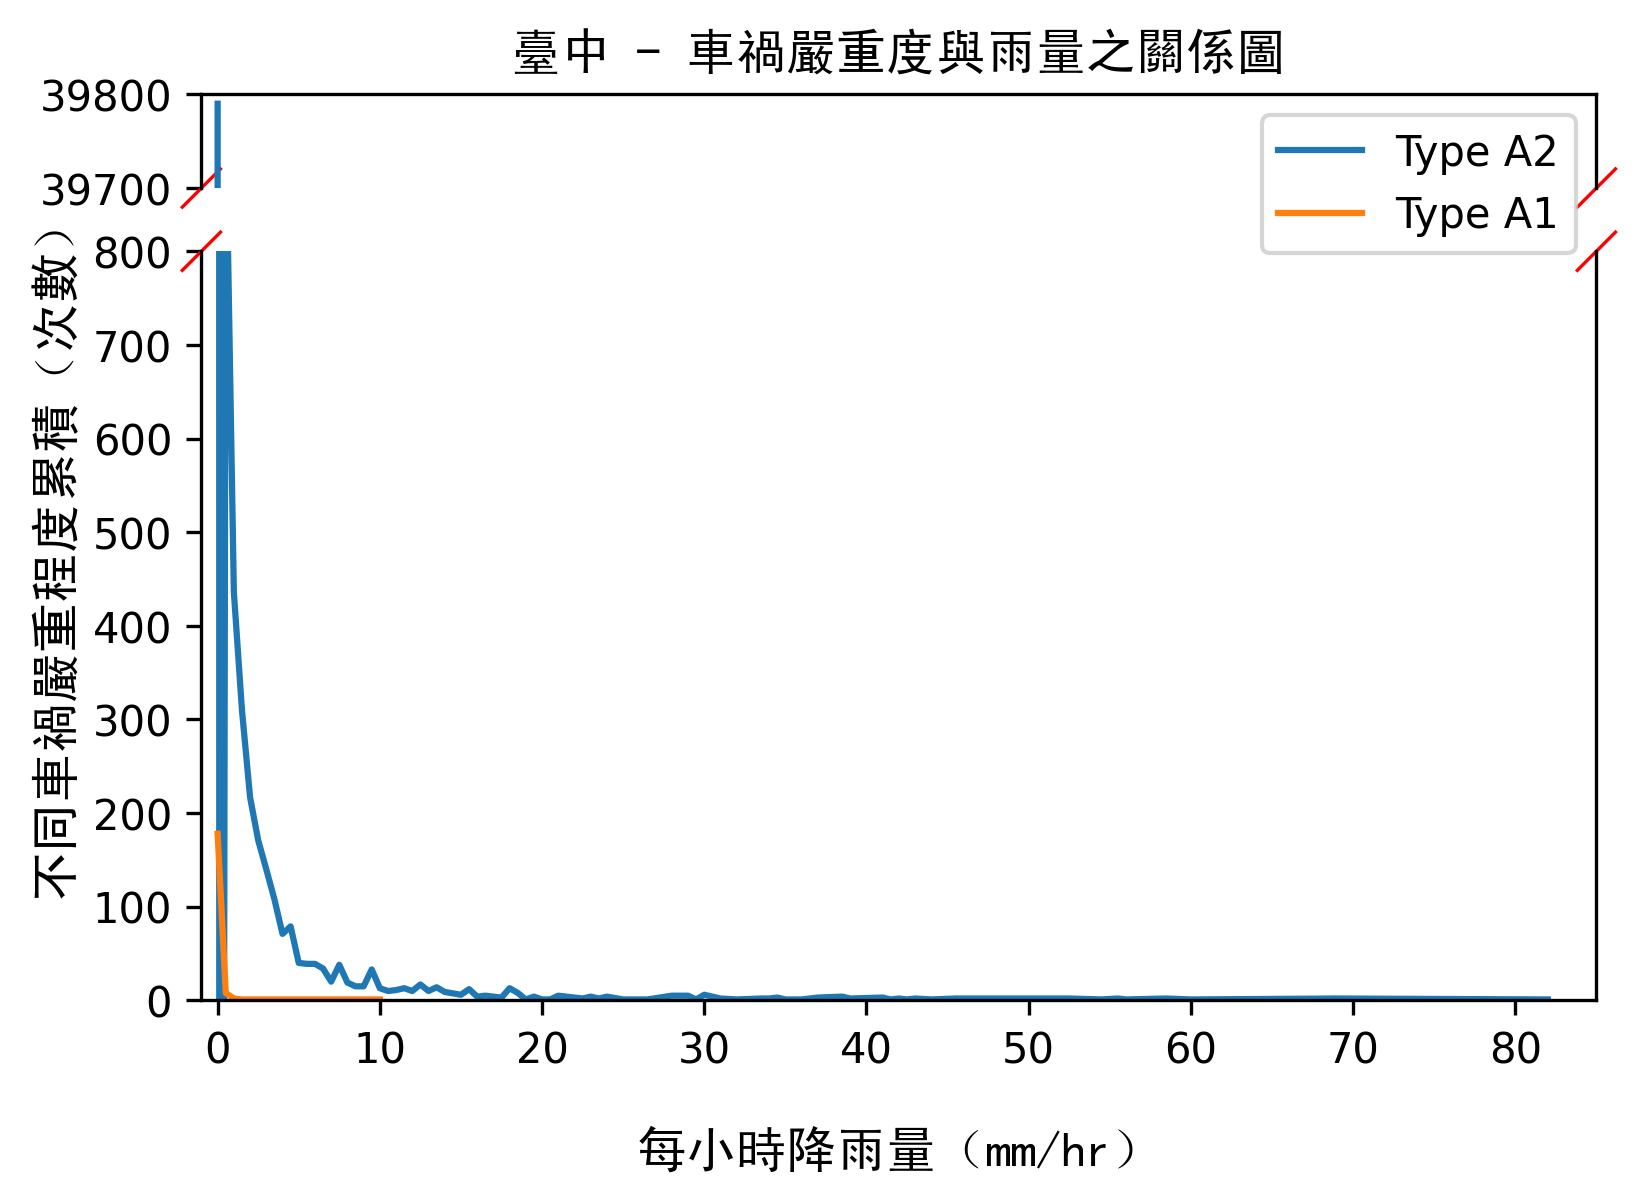

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.5, 5.1, 5.3, 5.5, 5.9, 6.6, 7.8, 8.1, 10.6]
[9, 3, 5, 3, 10, 5, 5, 8, 8, 10, 3, 8, 7, 13, 6, 6, 7, 1, 3, 5, 6, 2, 4, 6, 4, 3, 3, 1, 2, 1, 2, 1, 1, 2, 5, 3, 1, 2, 1, 4, 4, 1, 1, 2, 1, 1, 1, 1, 1, 1]
[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0, 1.1, 1.2, 1.3, 1.4, 1.5, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 7.9, 8.0, 8.1, 8.2, 8.3, 8.4, 8.5, 8.6, 8.7, 8.8, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.6, 9.7, 9.8, 9.9, 10.0, 10.1, 10.2, 10.3, 10.4, 10.5, 10.6, 10.7, 10.8, 10.9, 11.0, 11.1, 11.2, 11.3, 11.4, 11.

/Users/yangsicheng/Library/Mobile Documents/com~apple~CloudDocs/輔大課程/國衛院實習/DigiTalant_必修課程/project_101/venv/lib/python3.6/site-packages/ipykernel_launcher.py:54: MatplotlibDeprecationWarning: Case-insensitive properties were deprecated in 3.3 and support will be removed two minor releases later


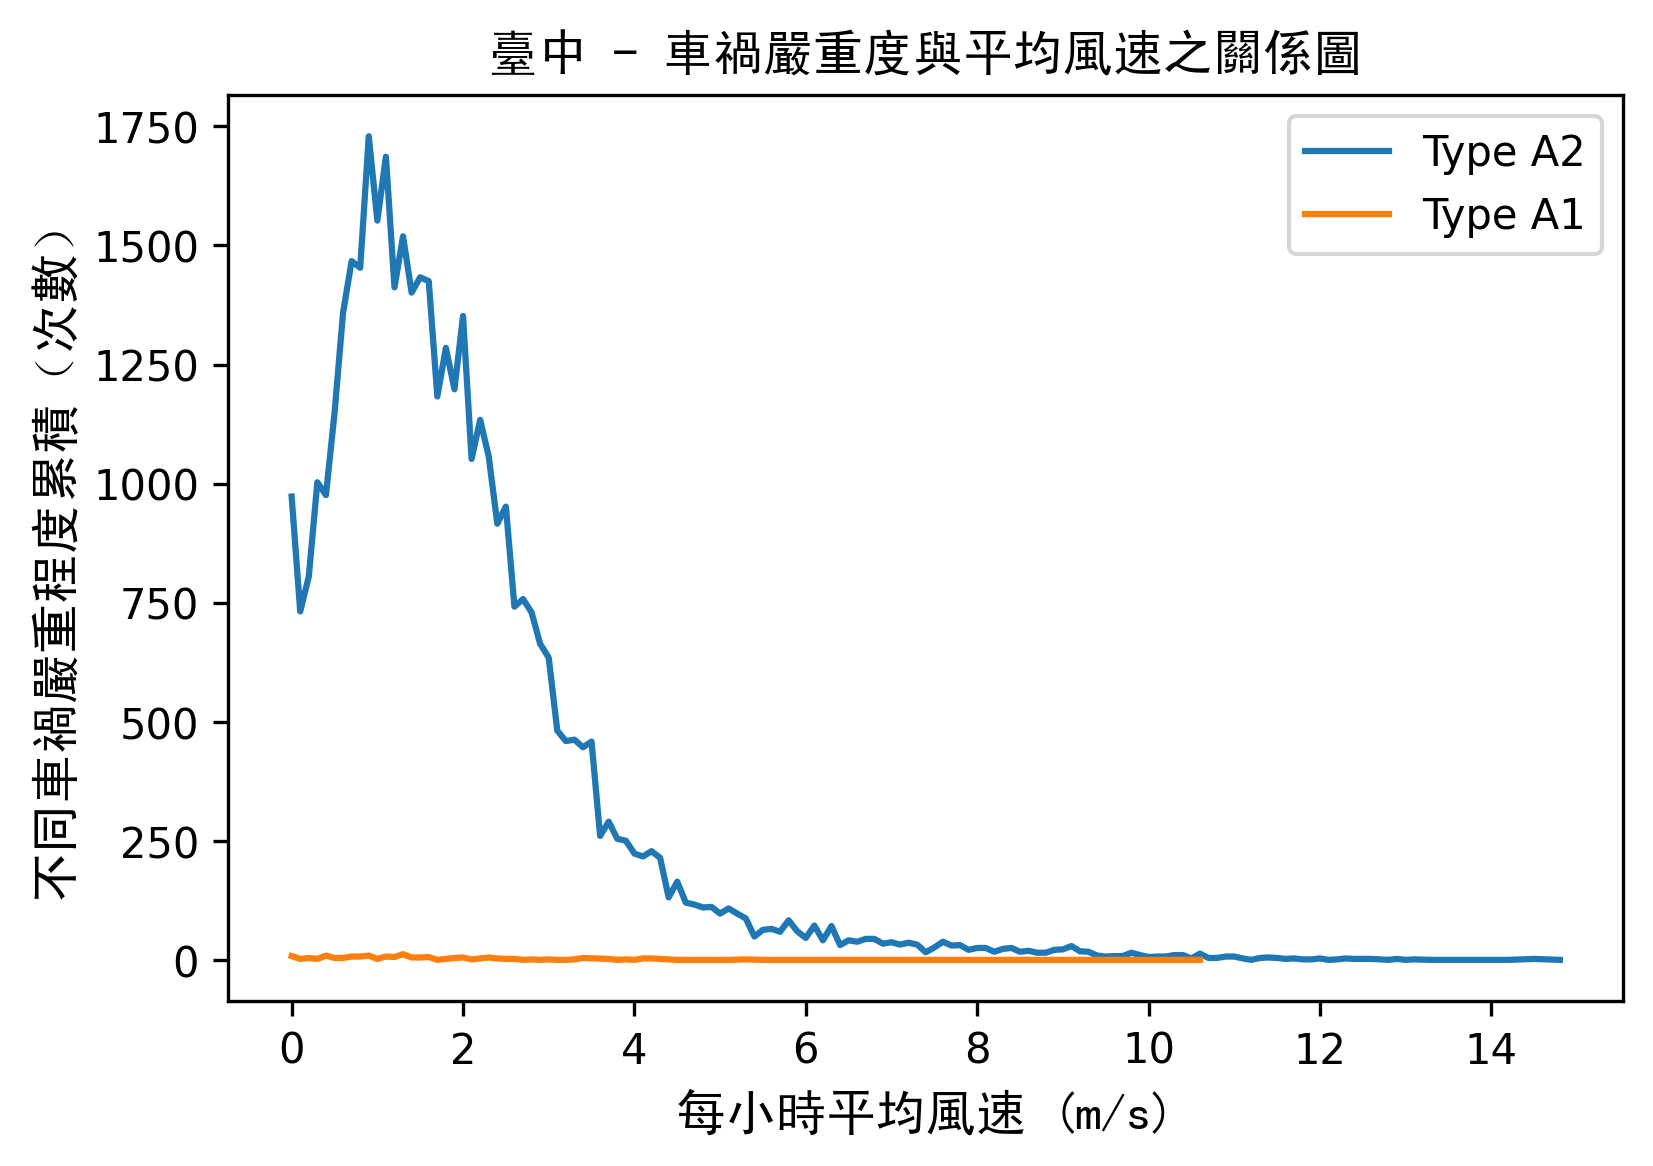

[0.0, 1.4, 1.6, 2.0, 2.1, 2.7, 2.9, 3.0, 3.3, 3.4, 3.5, 3.6, 3.9, 4.3, 5.8, 6.5, 6.6, 6.7, 6.8, 6.9, 7.2, 7.3, 7.5, 8.0, 8.2, 8.9, 9.3, 9.5, 9.6, 9.7, 10.0, 11.9, 12.0, 20.1, 22.3]
[154, 1, 1, 2, 1, 1, 1, 1, 1, 2, 2, 1, 1, 1, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]
[0.0, 1.2, 1.3, 1.4, 1.6, 1.7, 1.8, 1.9, 2.0, 2.1, 2.2, 2.3, 2.4, 2.5, 2.6, 2.7, 2.8, 2.9, 3.0, 3.1, 3.2, 3.3, 3.4, 3.5, 3.6, 3.7, 3.8, 3.9, 4.0, 4.1, 4.2, 4.3, 4.4, 4.5, 4.6, 4.7, 4.8, 4.9, 5.0, 5.1, 5.2, 5.3, 5.4, 5.5, 5.6, 5.7, 5.8, 5.9, 6.0, 6.1, 6.2, 6.3, 6.4, 6.5, 6.6, 6.7, 6.8, 6.9, 7.0, 7.1, 7.2, 7.3, 7.4, 7.5, 7.6, 7.7, 7.8, 8.0, 8.1, 8.2, 8.3, 8.4, 8.6, 8.7, 8.9, 9.0, 9.1, 9.2, 9.3, 9.4, 9.5, 9.8, 10.0, 10.1, 10.3, 10.4, 10.6, 10.7, 10.8, 10.9, 11.0, 11.4, 11.5, 11.8, 12.1, 12.3, 12.6, 12.9, 13.0, 13.2, 13.3, 13.7, 13.8, 13.9, 14.2, 14.7, 15.0, 15.5, 15.8, 16.0, 16.3, 16.6, 16.8, 17.1, 20.5, 21.6, 21.9, 23.0, 23.4, 23.5, 24.1, 25.3]
[118, 21, 25, 36, 59, 51, 1, 49, 1, 30, 1, 84, 53, 56, 1, 10

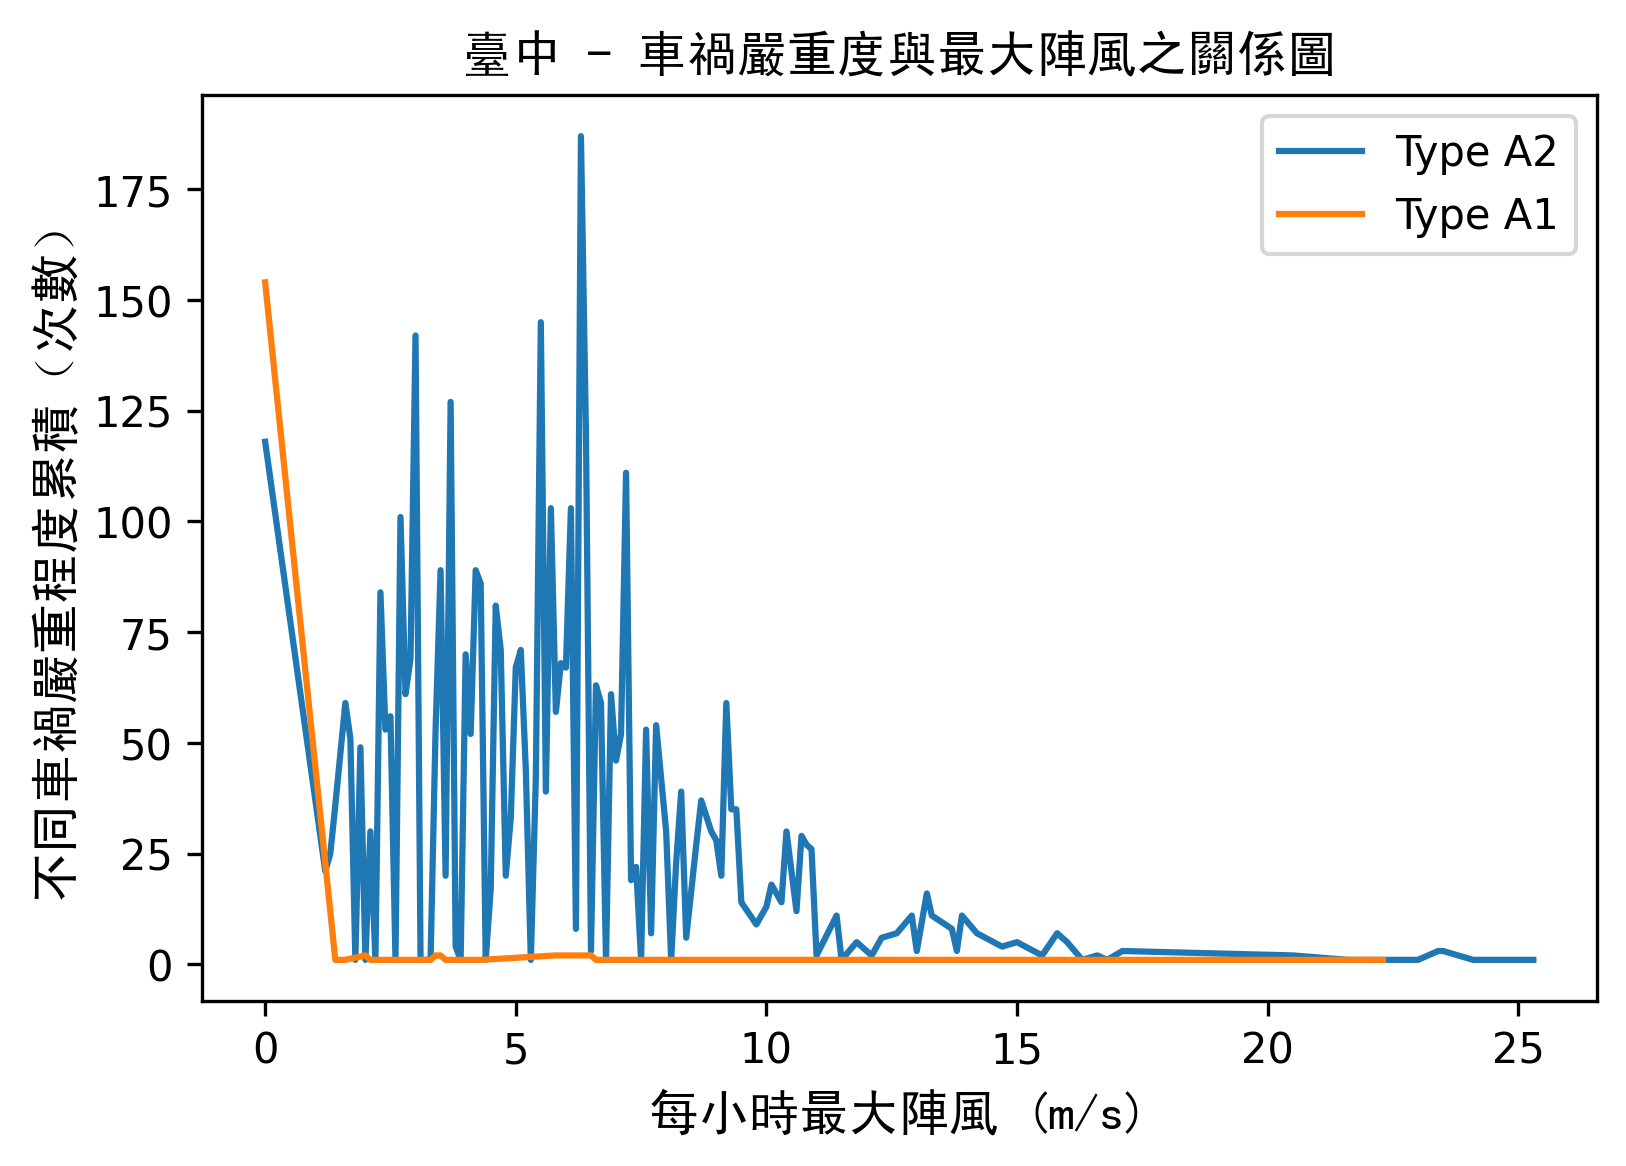

In [37]:
new_draw(A1_rain, A2_rain,A3_rain,85,0,800,39700,39800,"每小時降雨量（mm/hr）","不同車禍嚴重程度累積（次數）","臺中 - 車禍嚴重度與雨量之關係圖",True)
new_draw(A1_WS, A2_WS, A3_WS,15,0,700,1400,1500,"每小時平均風速 (m/s)","不同車禍嚴重程度累積（次數）","臺中 - 車禍嚴重度與平均風速之關係圖"),
new_draw(A1_WSGust, A2_WSGust, A3_WSGust,100,0,100,1500,1600,"每小時最大陣風 (m/s)","不同車禍嚴重程度累積（次數）","臺中 - 車禍嚴重度與最大陣風之關係圖")